In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
train_data <- read.csv("C:/Users/swift/Desktop/train.csv")

In [3]:
data_information <- function(df_in){

    missing_counts <- sapply(df_in, function(x) sum(is.na(x)))
    info_df <- data.frame("num_missing" = missing_counts, stringsAsFactors = FALSE)
    
    info_df$"num_unique" <- sapply(df_in, function(x) length(unique(na.omit(x))))
    
    info_df$data_type <- sapply(df_in, class)
    
    info_df <- tibble::rownames_to_column(info_df, "variable")
                                   
    print(info_df)
    cat("\n\nThere are", nrow(df_in), "rows and", ncol(df_in), "columns of data\n")
}

In [4]:
data_information(train_data)

                      variable num_missing num_unique data_type
1                        brand           0         26 character
2                        model           0       3499 character
3                         year           2         59   numeric
4                      mileage           2      17412   numeric
5                       engine           0       1164 character
6                  engine_size        1249         62   numeric
7                 transmission           0        190 character
8       automatic_transmission           2          2   numeric
9                    fuel_type           0         11 character
10                  drivetrain           0          6 character
11                     min_mpg        3006         53   numeric
12                     max_mpg        3006         57   numeric
13                     damaged         169          2   numeric
14                 first_owner         306          2   numeric
15              personal_using         1

In [3]:
treatment1 <- function(df_in){
    df_in$price <- as.numeric(df_in$price)
    df_in$age <- 2024 - df_in$year
    df_in <- na.omit(df_in)
    return(df_in)
}

In [4]:
train_data <- treatment1(train_data)

ERROR: Error: object 'train_data' not found


In [5]:
data_information(train_data)

ERROR: Error in data_information(train_data): could not find function "data_information"


In [10]:
# Define dependent variable and identify dummy variables
dependent_var <- "price"
binary_vars <- names(train_data)[sapply(train_data, function(x) length(unique(x)) == 2)]

# Identify categorical variables
categorical_vars <- names(train_data)[!(names(train_data) %in% binary_vars) & sapply(train_data, is.character)]

# Identify numerical variables (excluding dummy and dependent)
numerical_vars <- names(train_data)[!(names(train_data) %in% c(binary_vars, dependent_var)) & sapply(train_data, is.numeric)]


In [11]:
for (var_list_name in c("binary_vars", "categorical_vars", "numerical_vars")) {
  var_list <- get(var_list_name)
  cat("Variables in", var_list_name, ":\n")
  for (var in var_list) {
    print(var)
  }
    print("______________________________")
}


Variables in binary_vars :
[1] "automatic_transmission"
[1] "damaged"
[1] "first_owner"
[1] "personal_using"
[1] "turbo"
[1] "alloy_wheels"
[1] "adaptive_cruise_control"
[1] "navigation_system"
[1] "power_liftgate"
[1] "backup_camera"
[1] "keyless_start"
[1] "remote_start"
[1] "sunroof.moonroof"
[1] "automatic_emergency_braking"
[1] "stability_control"
[1] "leather_seats"
[1] "memory_seat"
[1] "third_row_seating"
[1] "apple_car_play.android_auto"
[1] "bluetooth"
[1] "usb_port"
[1] "heated_seats"
[1] "______________________________"
Variables in categorical_vars :
[1] "brand"
[1] "model"
[1] "engine"
[1] "transmission"
[1] "fuel_type"
[1] "drivetrain"
[1] "interior_color"
[1] "exterior_color"
[1] "______________________________"
Variables in numerical_vars :
[1] "year"
[1] "mileage"
[1] "engine_size"
[1] "min_mpg"
[1] "max_mpg"
[1] "age"
[1] "______________________________"


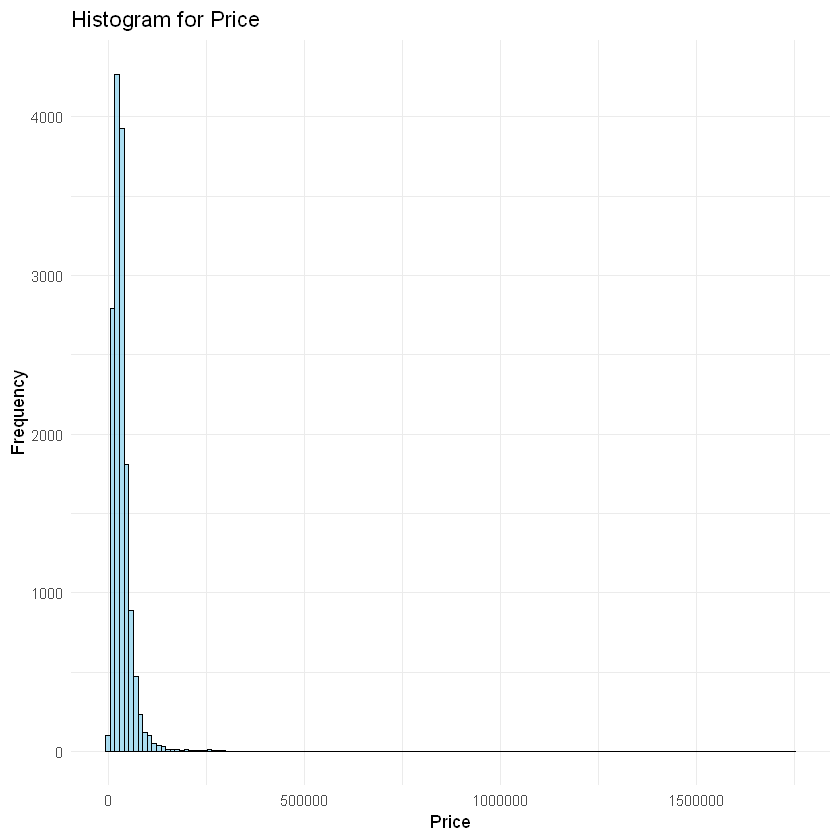

In [12]:
#  Plotting price histogram
ggplot(train_data, aes(x = price)) +
  geom_histogram(bins = 150, color = "black", fill = "skyblue", alpha = 0.7) +
  labs(x = "Price", y = "Frequency") +
  ggtitle("Histogram for Price") +
  theme_minimal()


In [13]:
treatment2 <- function(df_in){
    outlier_price <- quantile(df_in$price, 0.95)
    df_in <- df_in[df_in$price < outlier_price, ]
    return(df_in)
}

In [14]:
train_data <- treatment2(train_data)

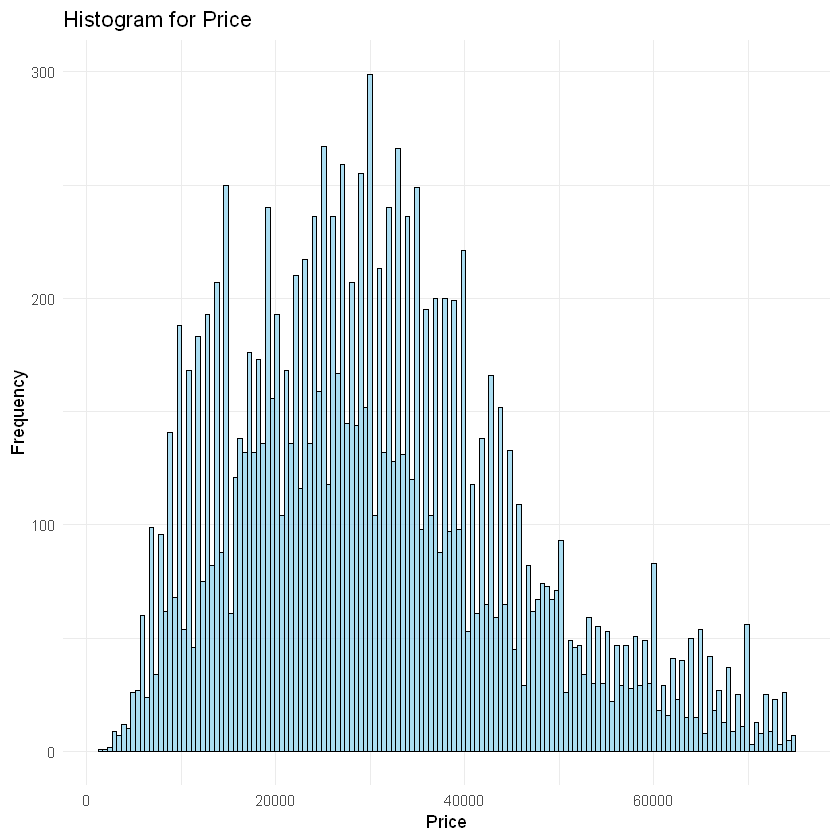

In [15]:
ggplot(train_data, aes(x = price)) +
  geom_histogram(bins = 150, color = "black", fill = "skyblue", alpha = 0.7) +
  labs(x = "Price", y = "Frequency") +
  ggtitle("Histogram for Price") +
  theme_minimal()


Summary for year :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1966    2016    2019    2018    2021    2024 
Summary for mileage :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    100   23234   43529   51651   72370  361662 
Summary for engine_size :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   2.500   2.812   3.500 390.000 
Summary for min_mpg :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   17.00   21.00   21.02   24.00   80.00 
Summary for max_mpg :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   24.00   28.00   28.05   31.00   94.00 
Summary for age :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   5.000   6.432   8.000  58.000 


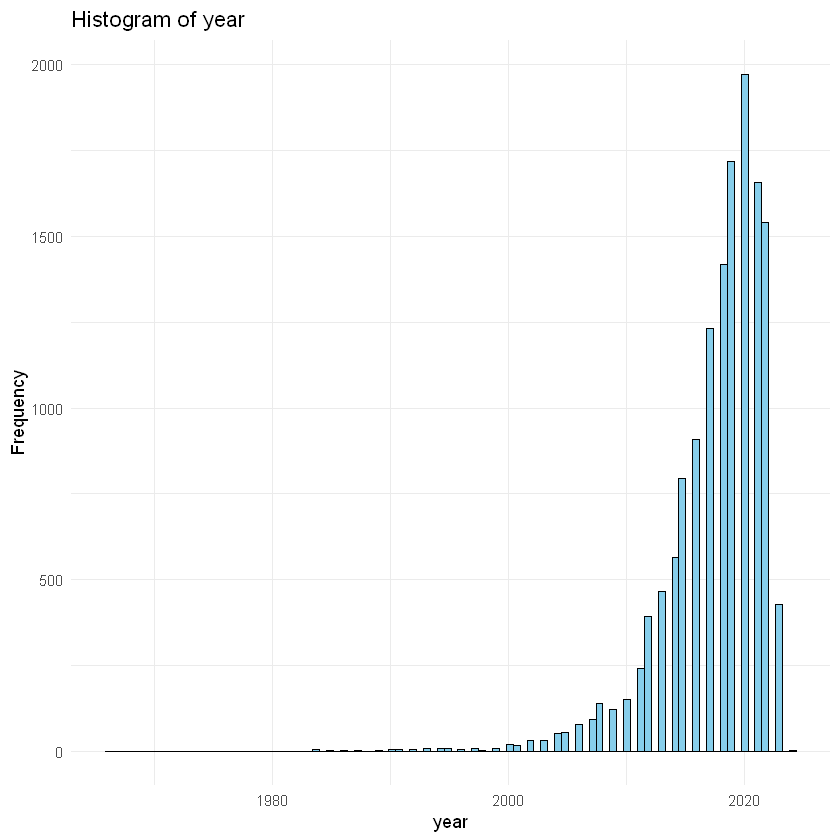

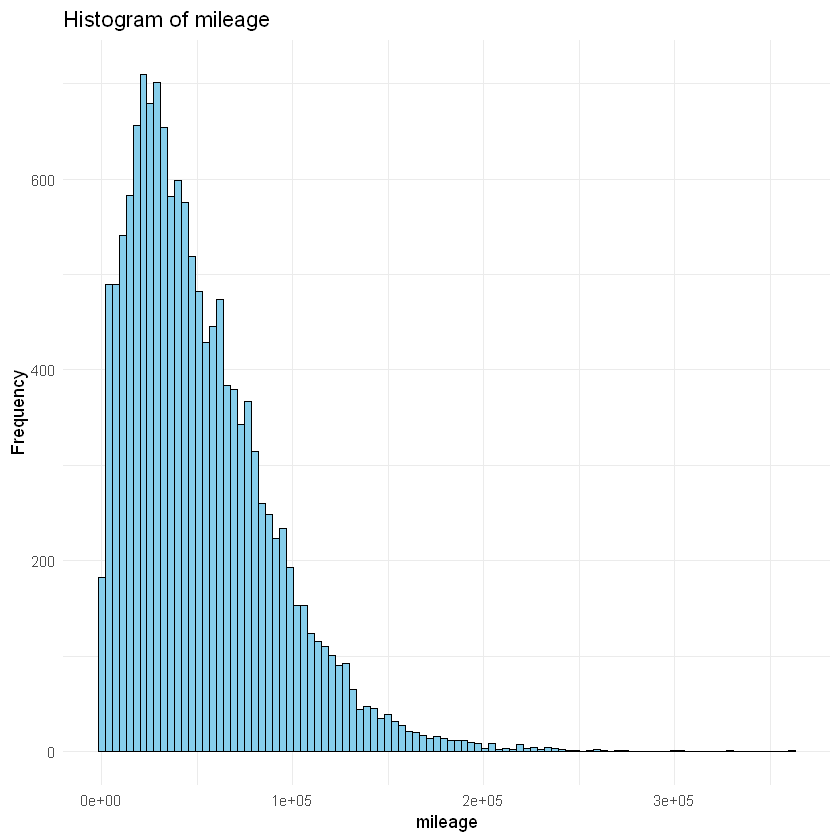

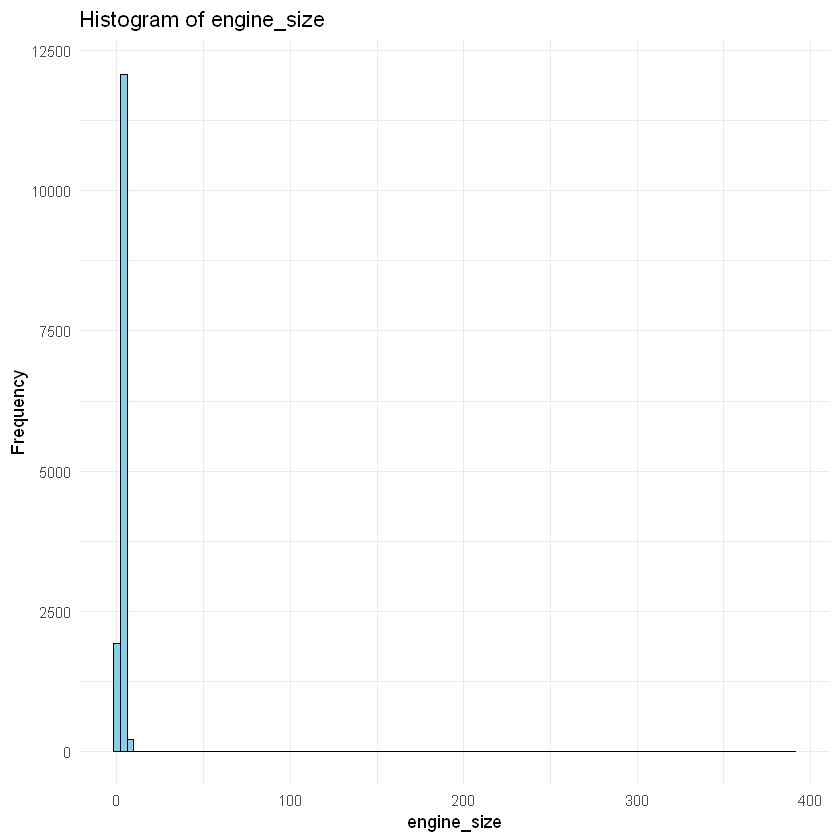

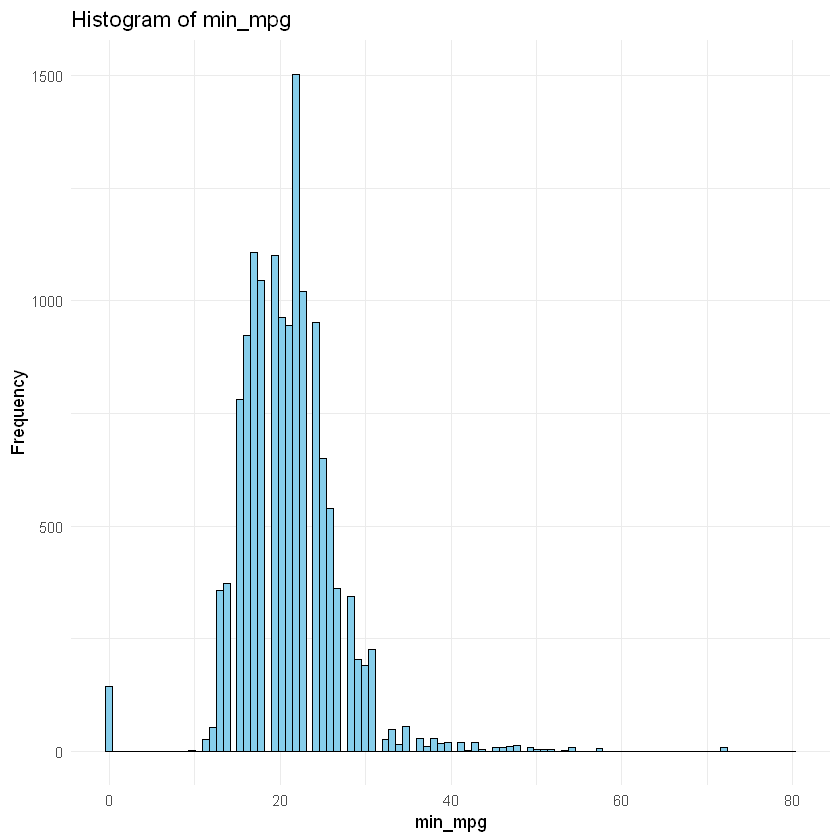

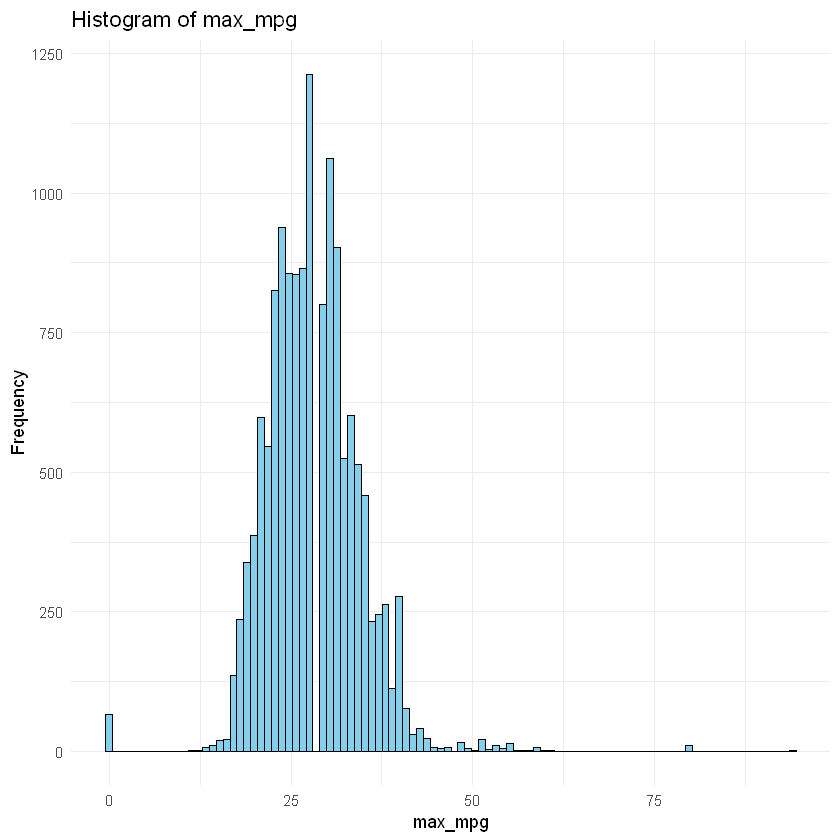

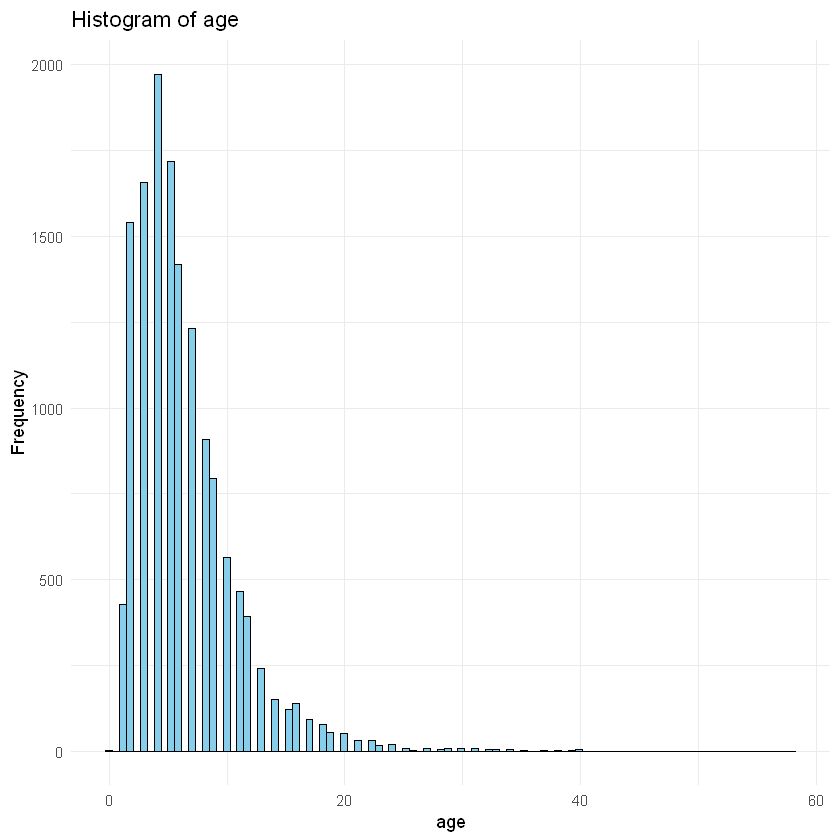

In [16]:
# Loop for printing summaries
for (col in numerical_vars) {
  summary_df <- summary(train_data[[col]])
  cat("Summary for", col, ":\n")
  print(summary_df)
}

# Loop for generating and printing plots
for (col in numerical_vars) {
  plot <- ggplot(train_data, aes(x = !!sym(col))) +
    geom_histogram(fill = "skyblue", color = "black", bins = 100) +
    labs(x = col, y = "Frequency") +
    ggtitle(paste("Histogram of", col)) +
    theme_minimal()
  
  print(plot)
}


In [17]:
treatment3 <- function(df_in){
    upper_threshold <- quantile(df_in$engine_size, 0.99)
    df_in <- df_in[df_in$engine_size <= upper_threshold, ]
    return(df_in)
}

In [18]:
train_data <- treatment3(train_data)

Summary for Engine Size:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   2.500   2.778   3.500   6.200 


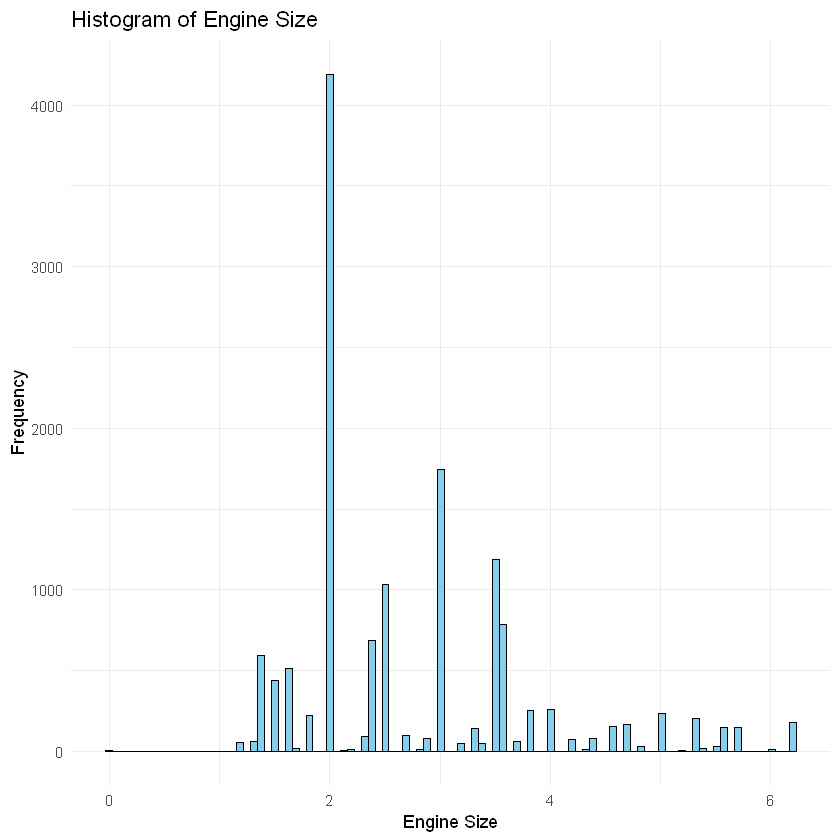

In [19]:
# Calculate summary statistics for engine_size
summary_engine_size <- summary(train_data$engine_size)

# Print the summary statistics
cat("Summary for Engine Size:\n")
print(summary_engine_size)

# Plot histogram for engine_size
ggplot(train_data, aes(x = engine_size)) +
  geom_histogram(fill = "skyblue", color = "black", bins = 100) +
  labs(x = "Engine Size", y = "Frequency") +
  ggtitle("Histogram of Engine Size") +
  theme_minimal()

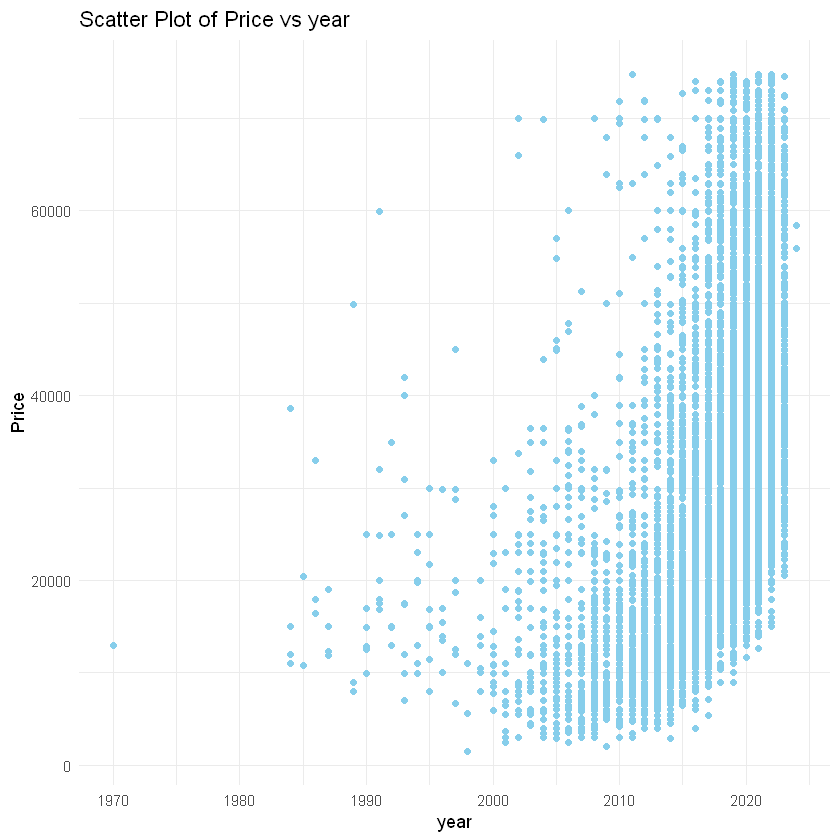

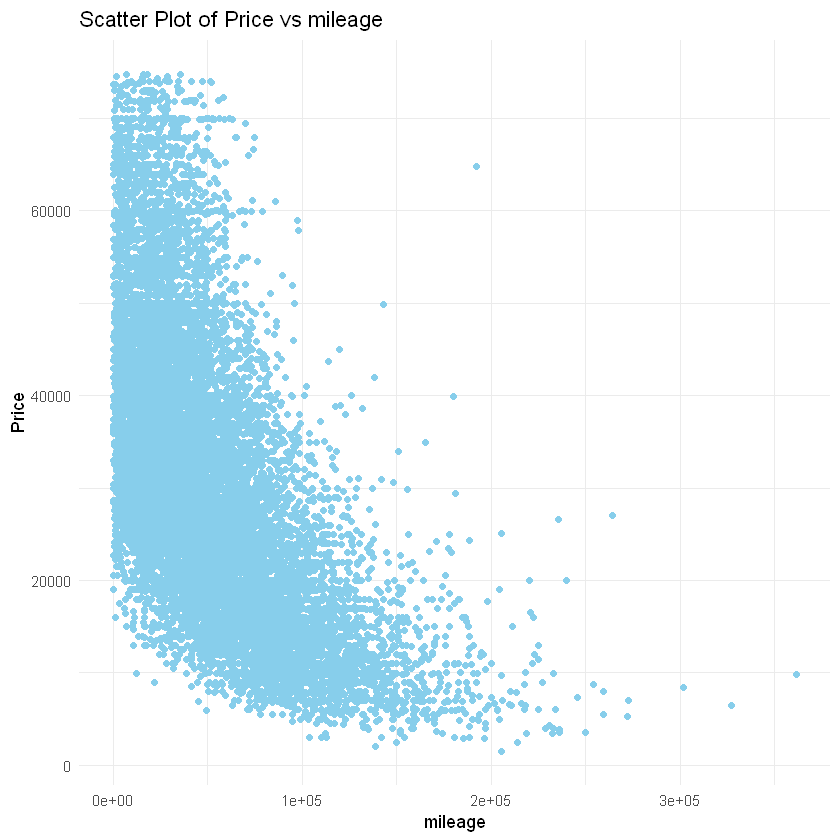

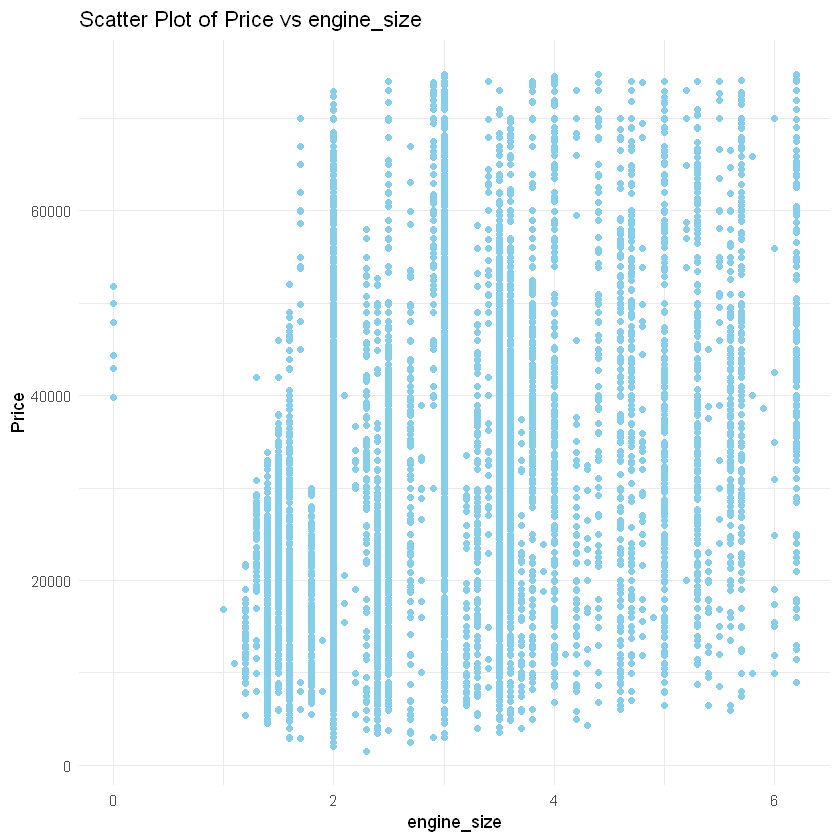

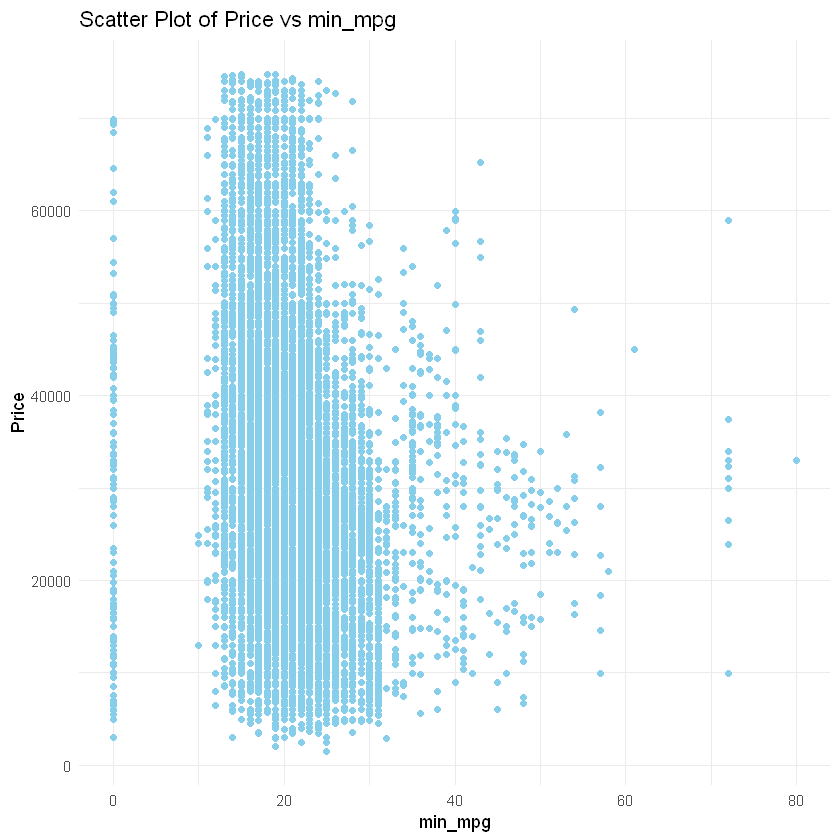

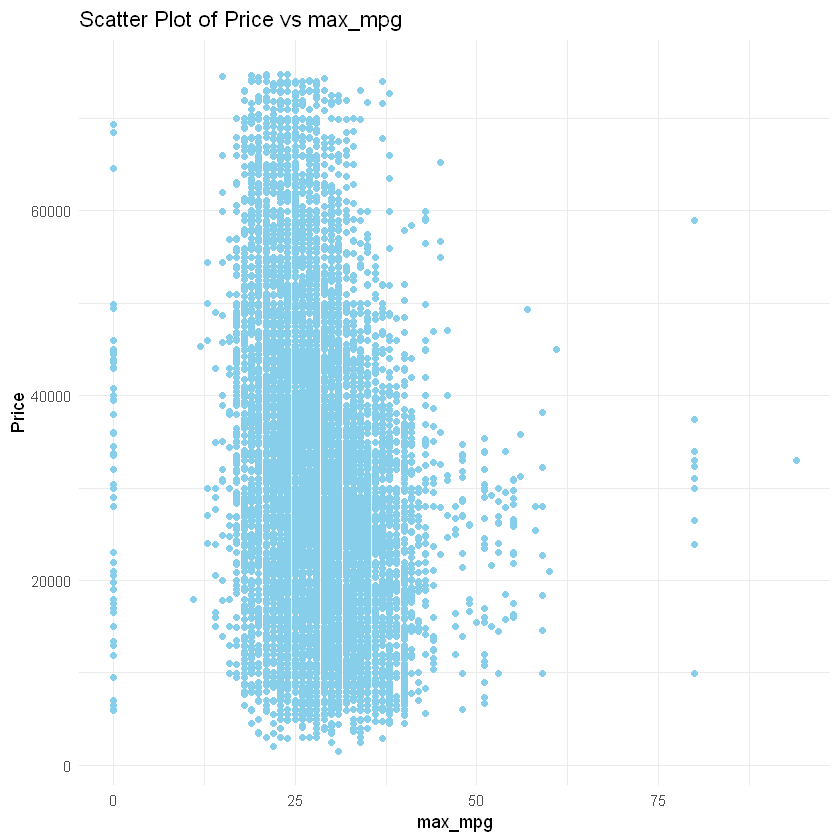

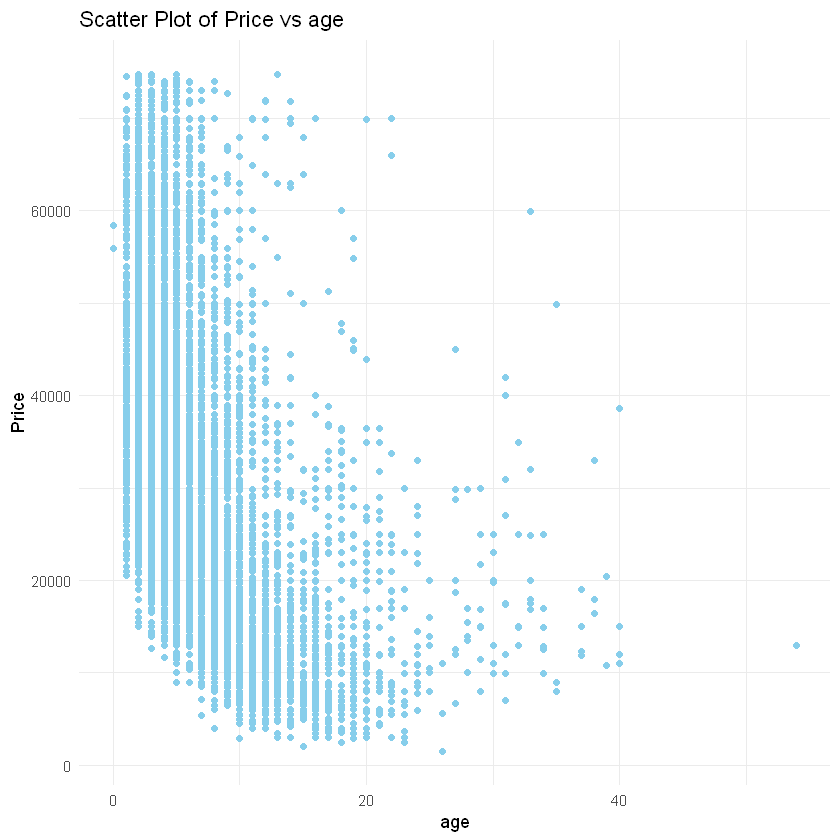

In [20]:
# Assuming 'clean_data' is your data frame and 'numerical_vars' contains numerical variable names
for (col in numerical_vars) {
  # Scatter plot for each numerical variable vs price
  plot <- ggplot(train_data, aes(x = !!sym(col), y = price)) +
    geom_point(color = "skyblue") +
    labs(x = col, y = "Price") +
    ggtitle(paste("Scatter Plot of", "Price vs", col)) +
    theme_minimal()
  
  # Print the scatter plot
  print(plot)
}

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


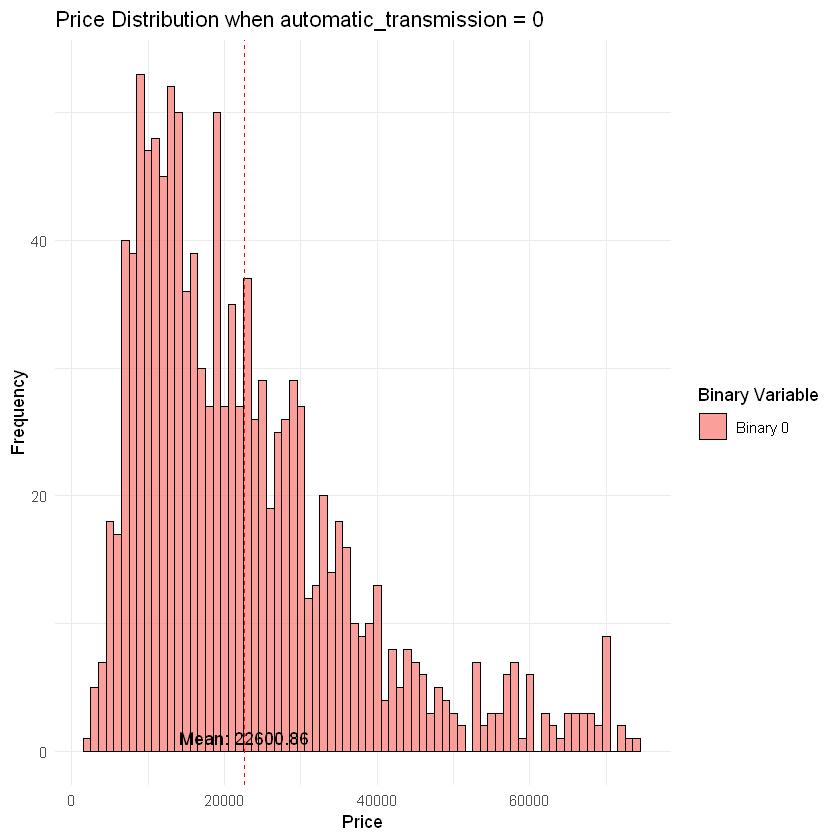

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


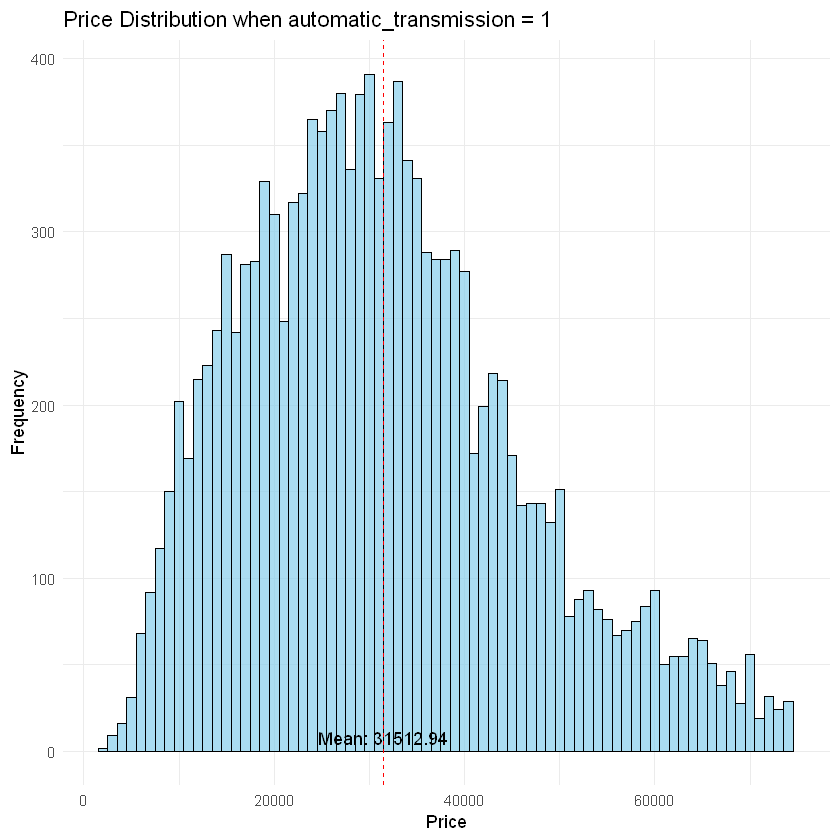

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


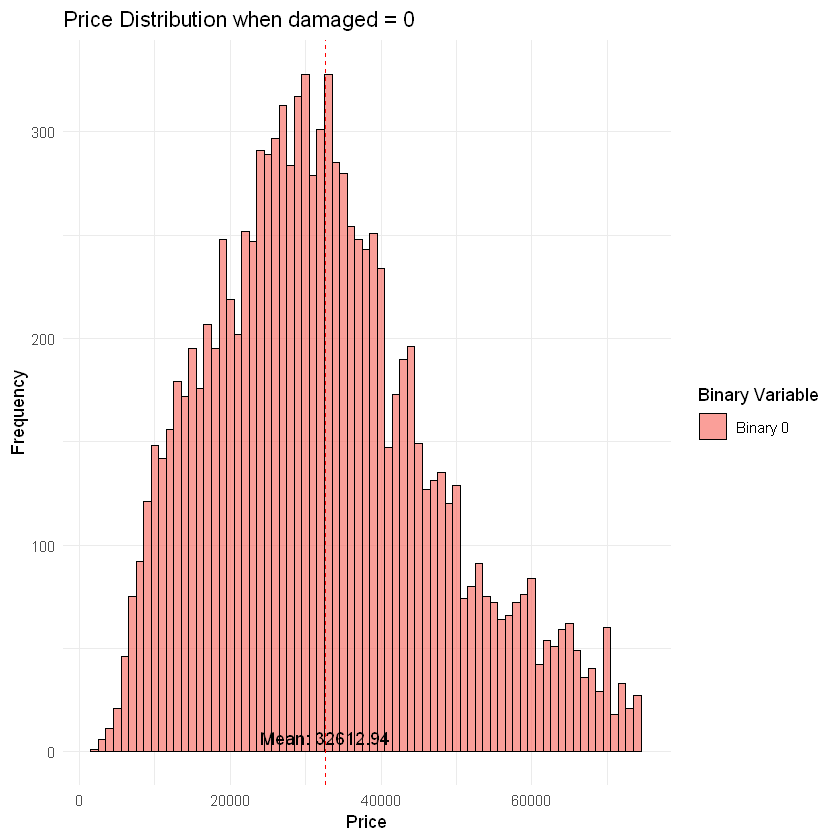

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


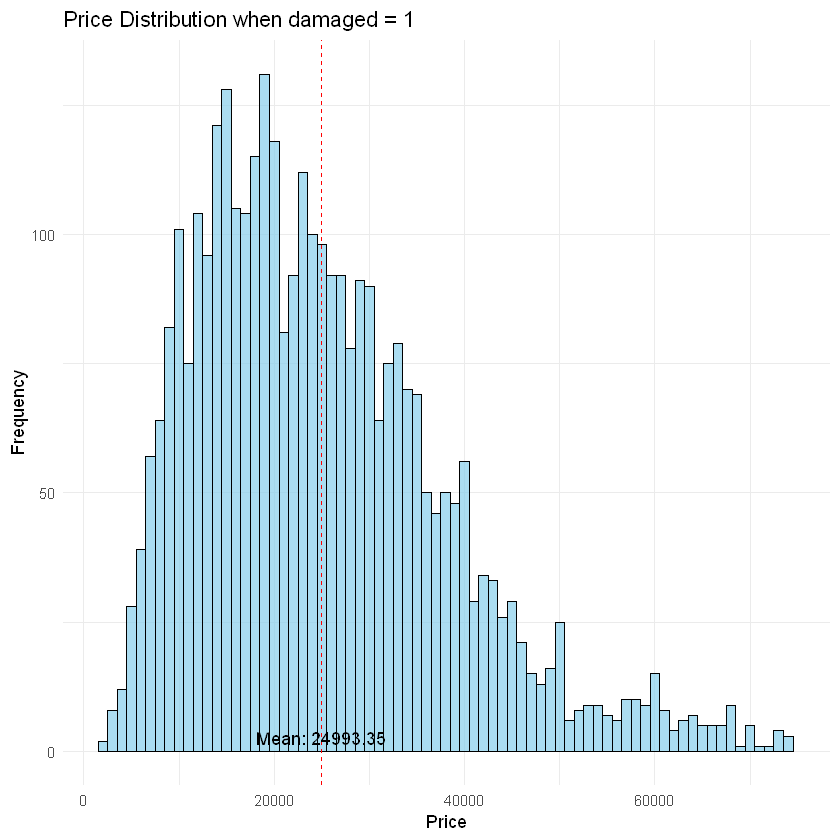

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


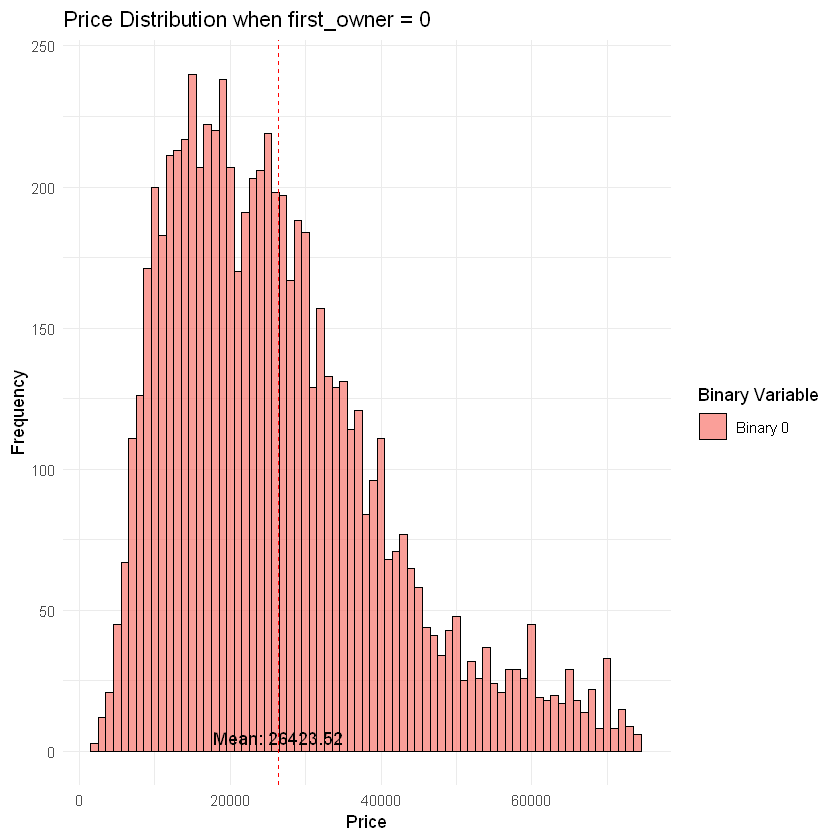

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


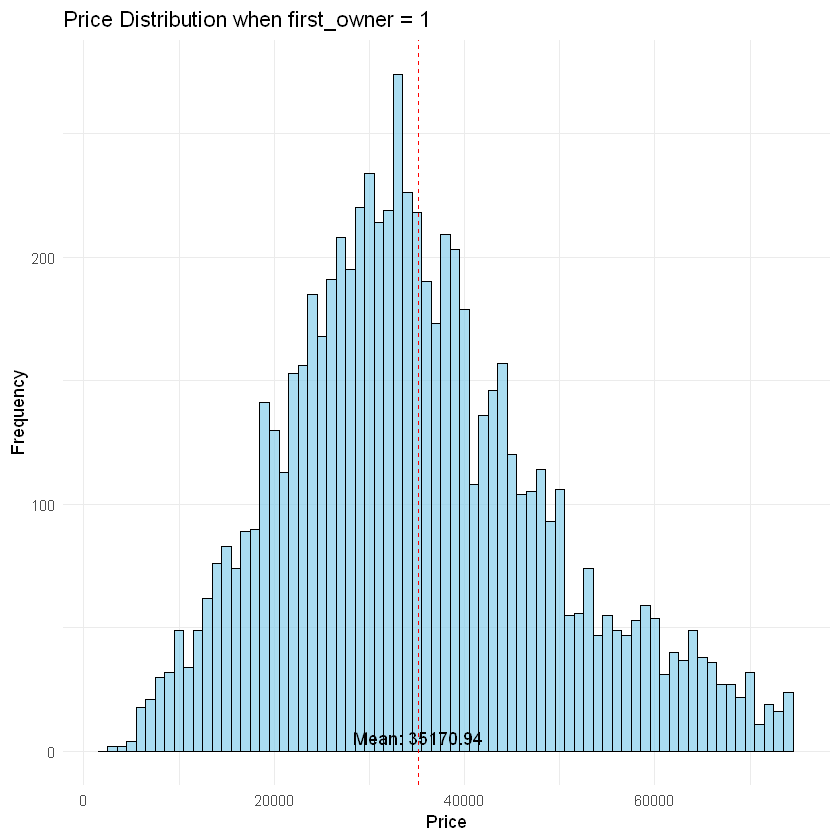

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


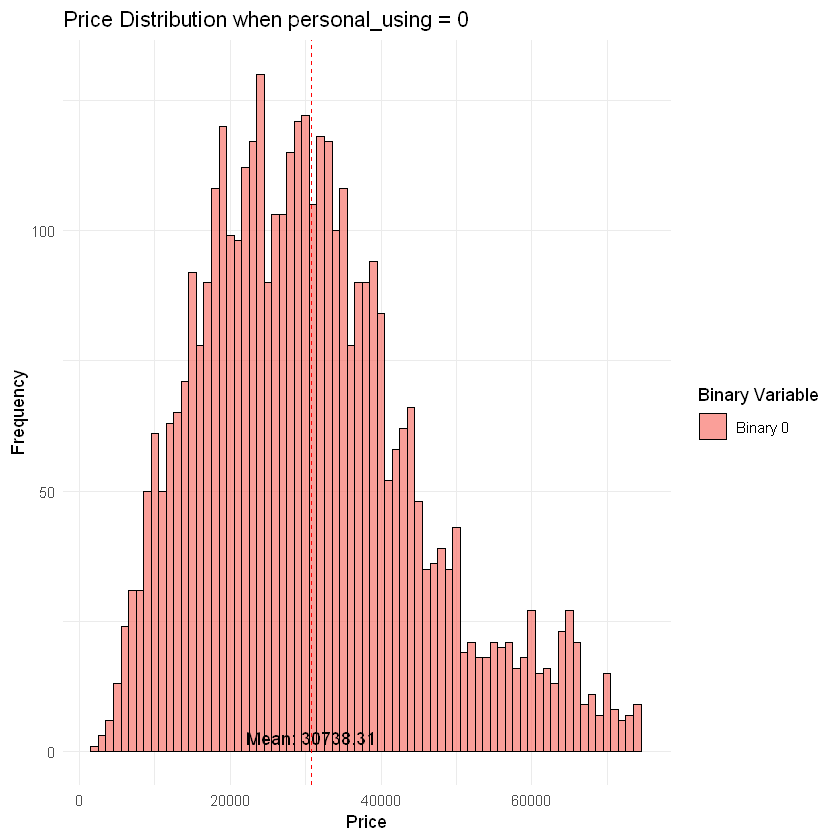

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


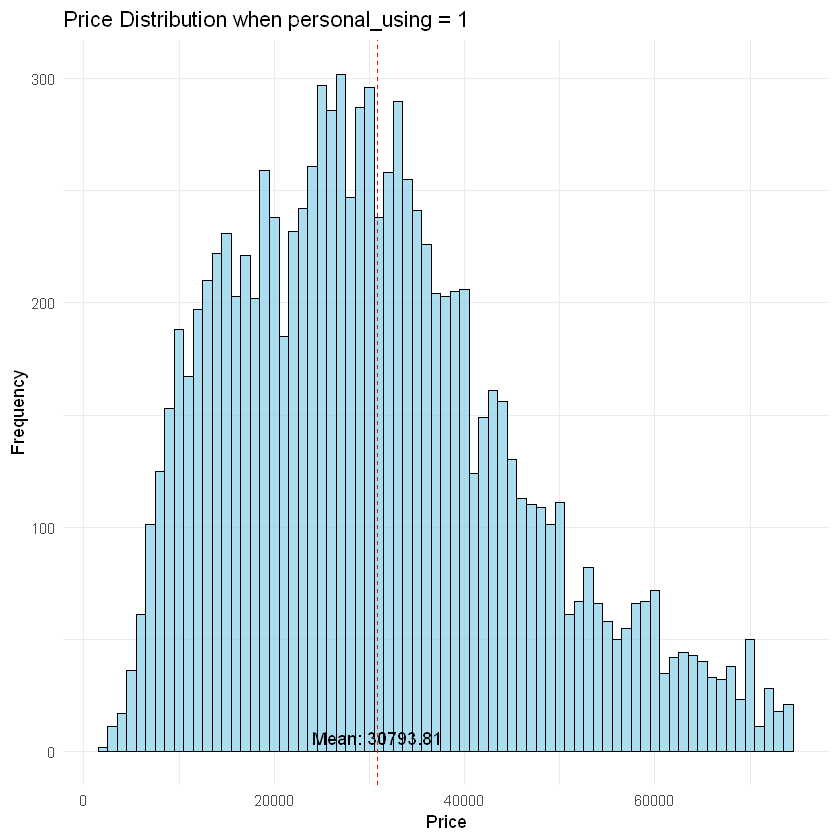

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


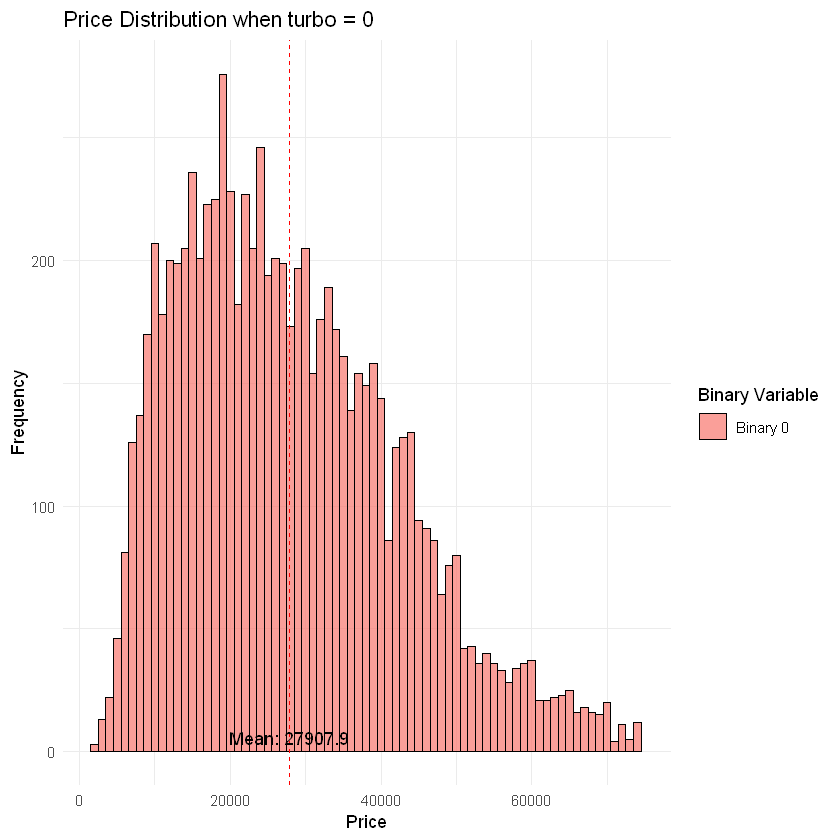

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


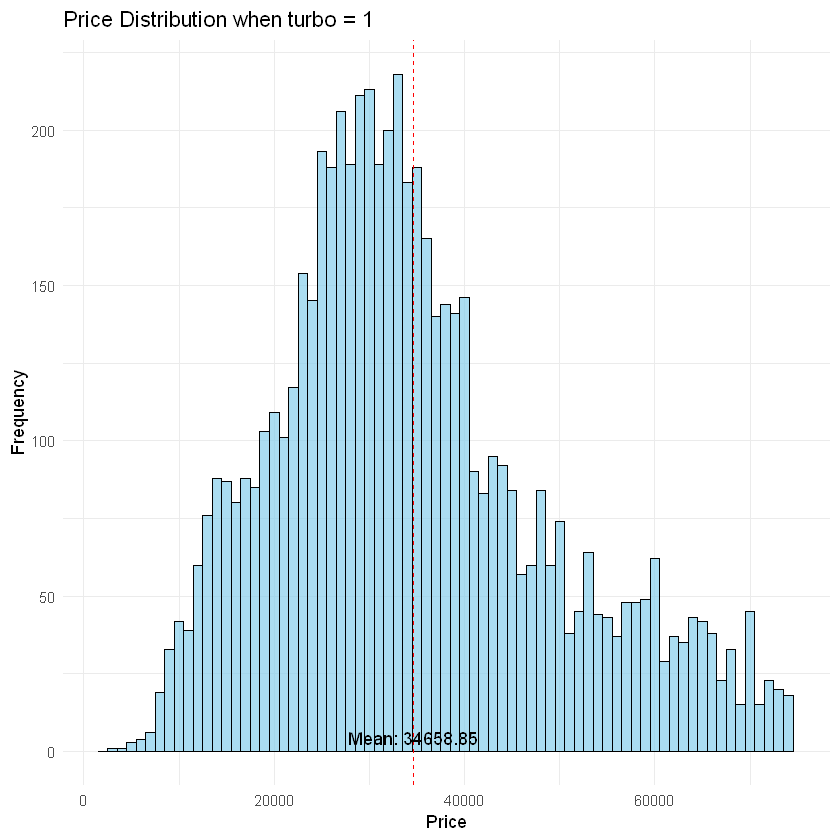

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


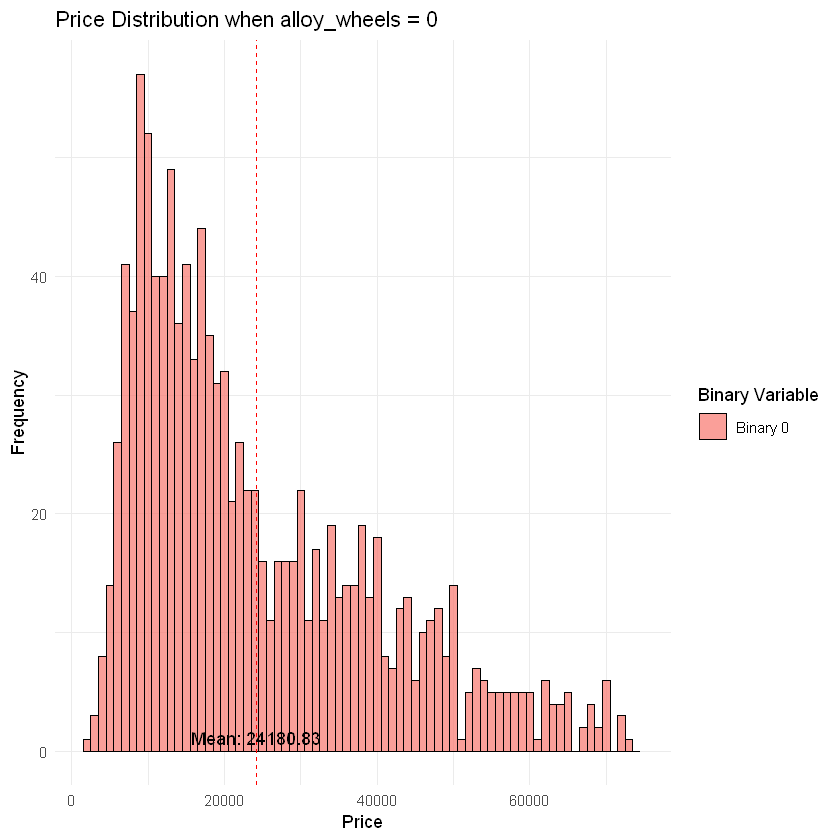

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


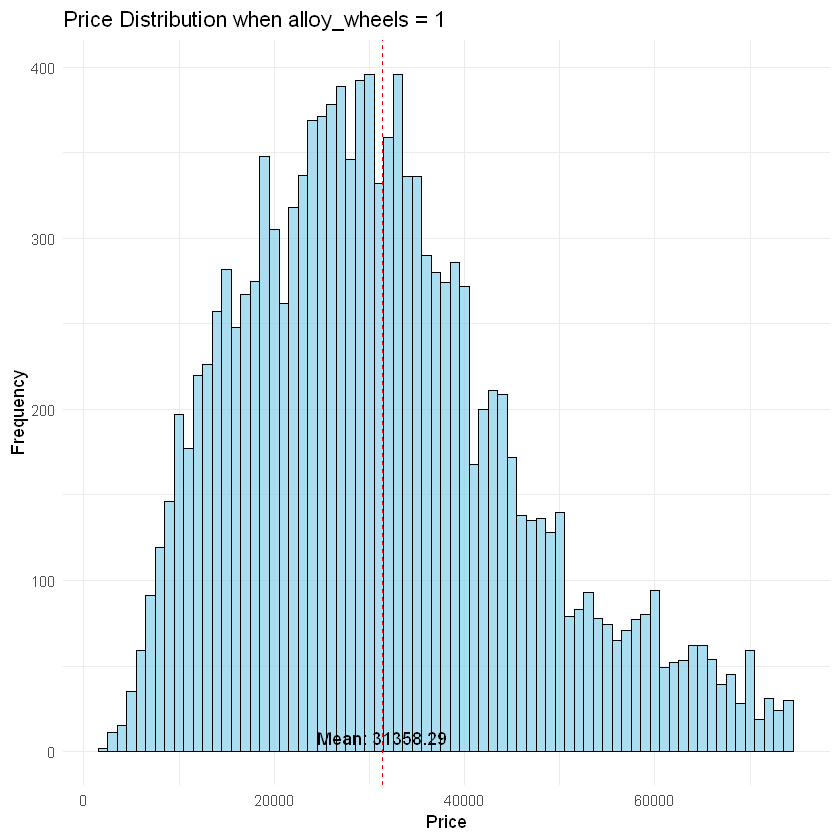

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


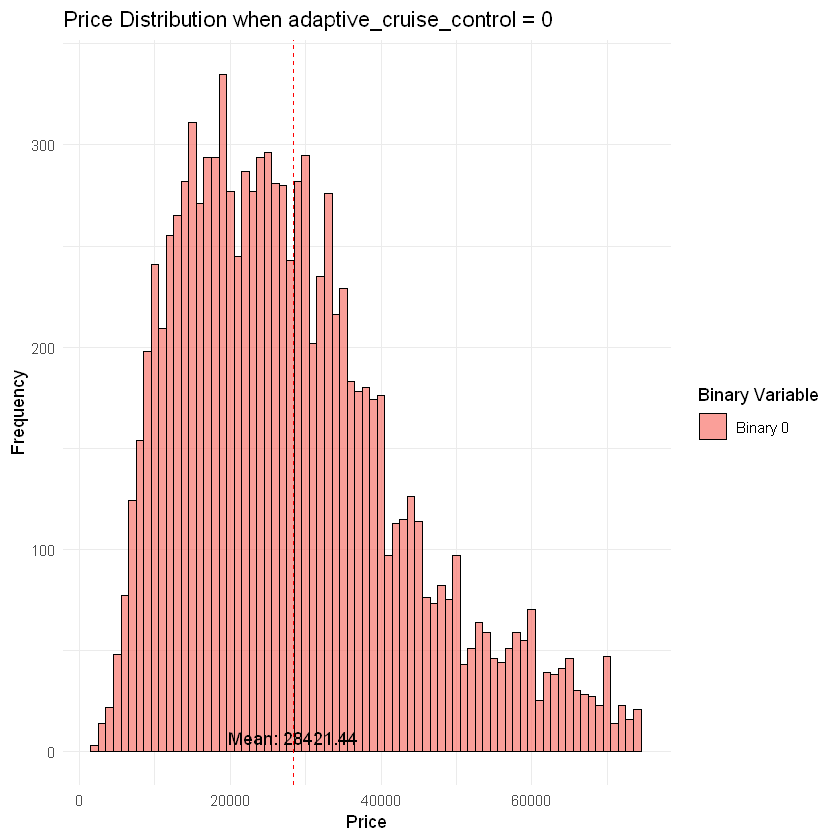

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


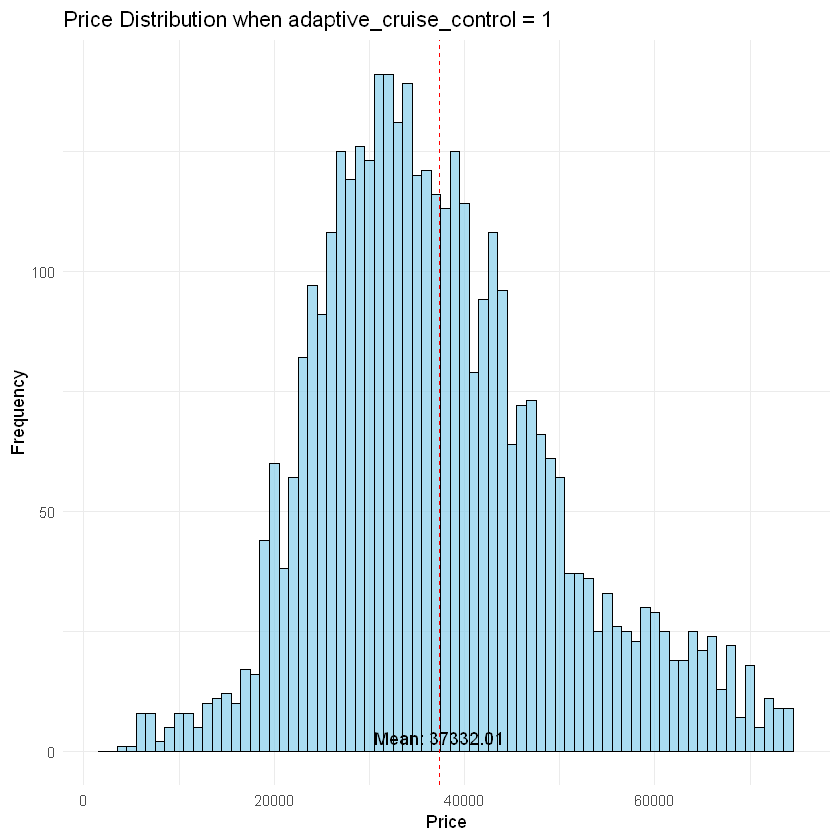

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


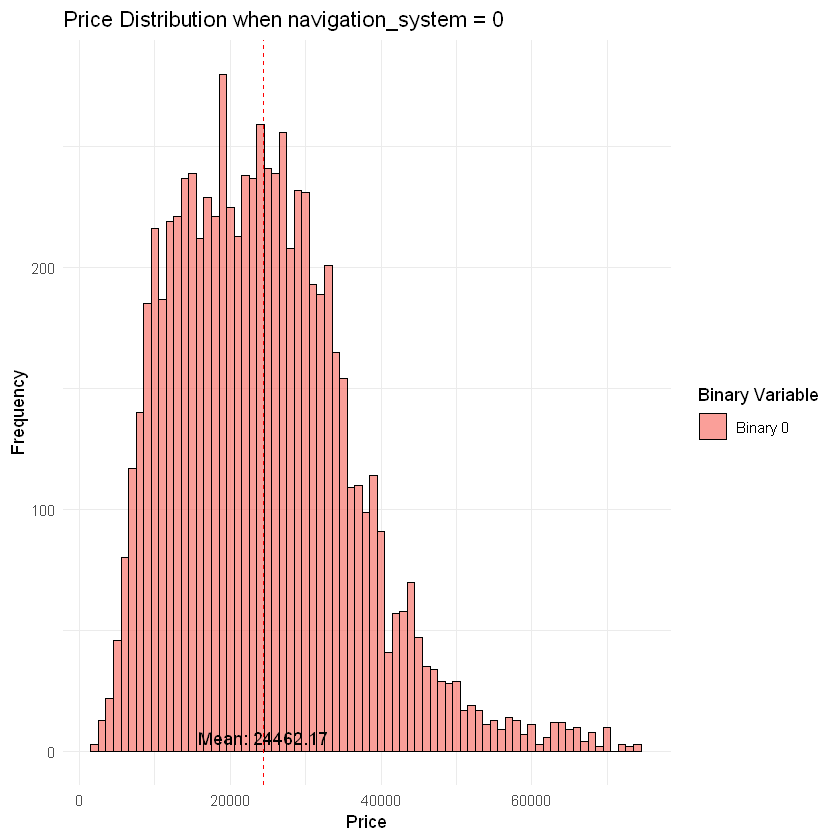

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


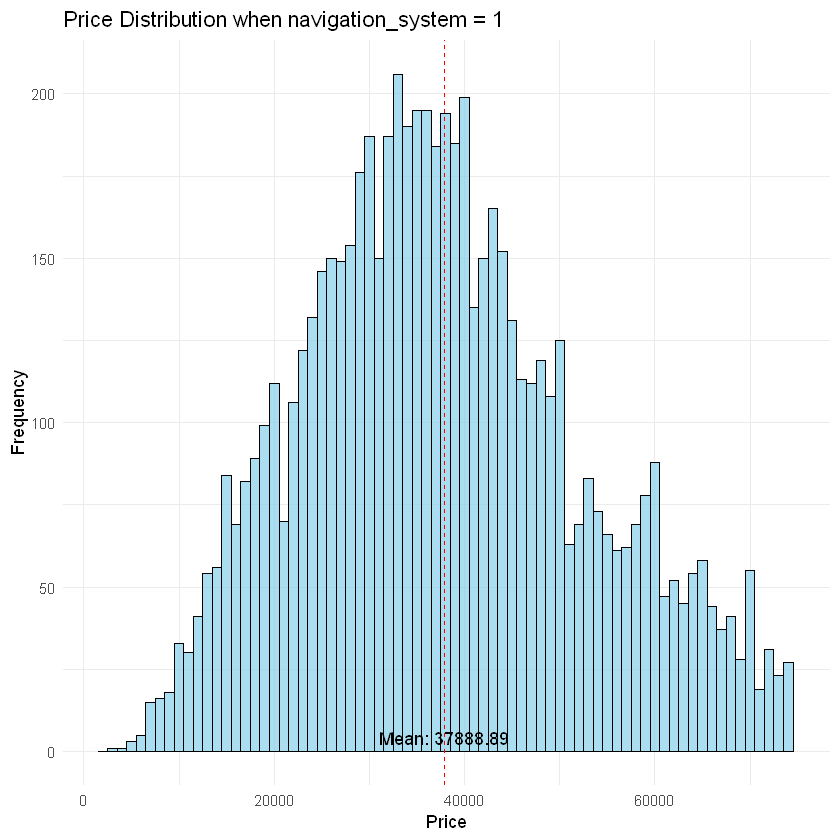

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


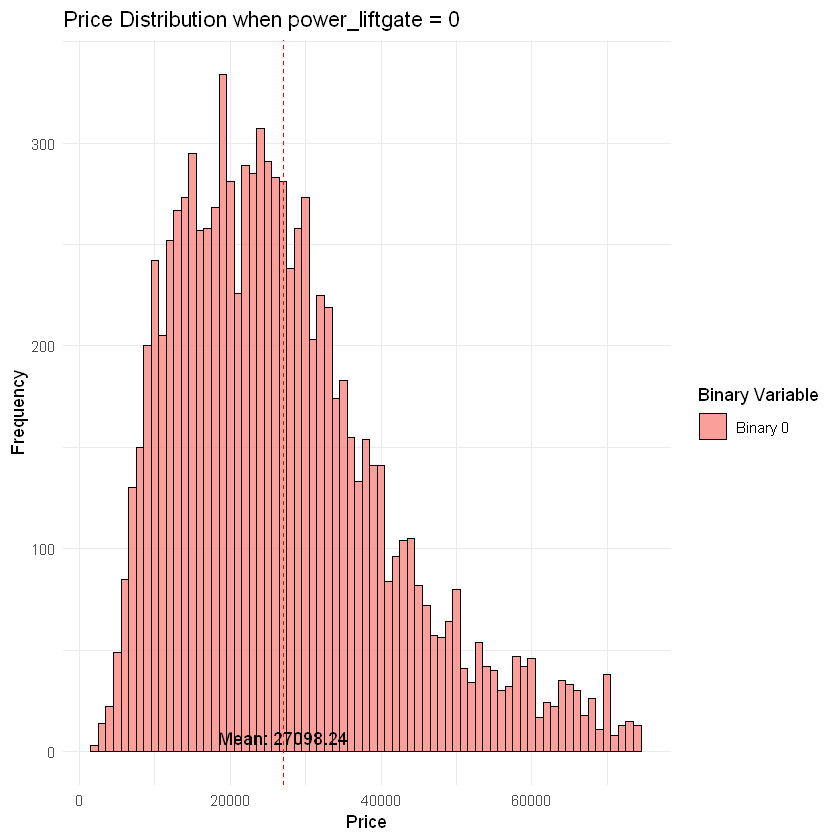

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


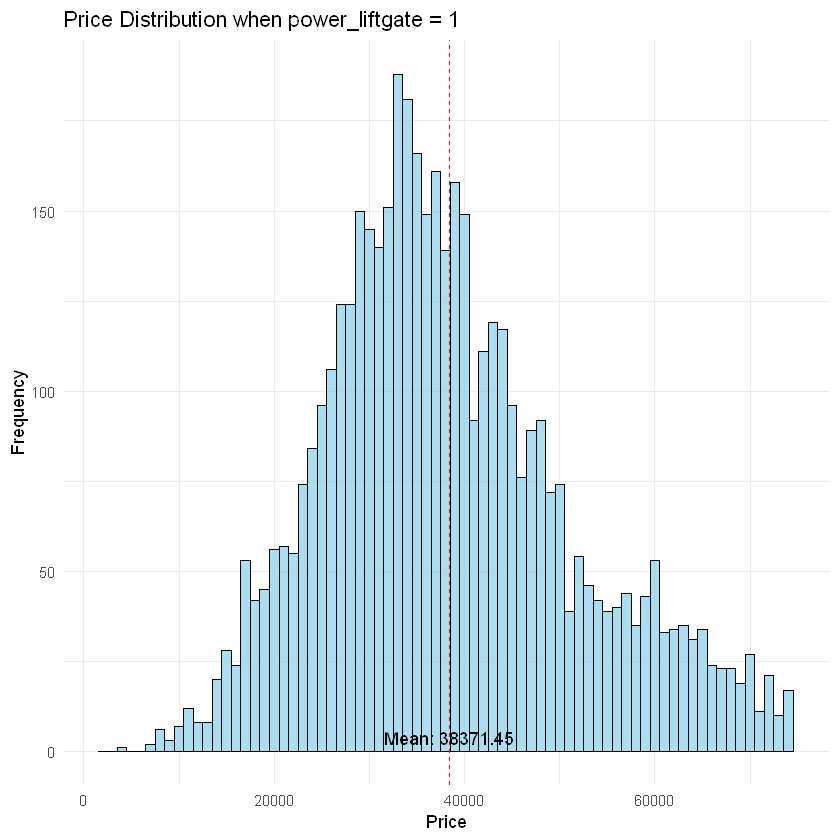

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


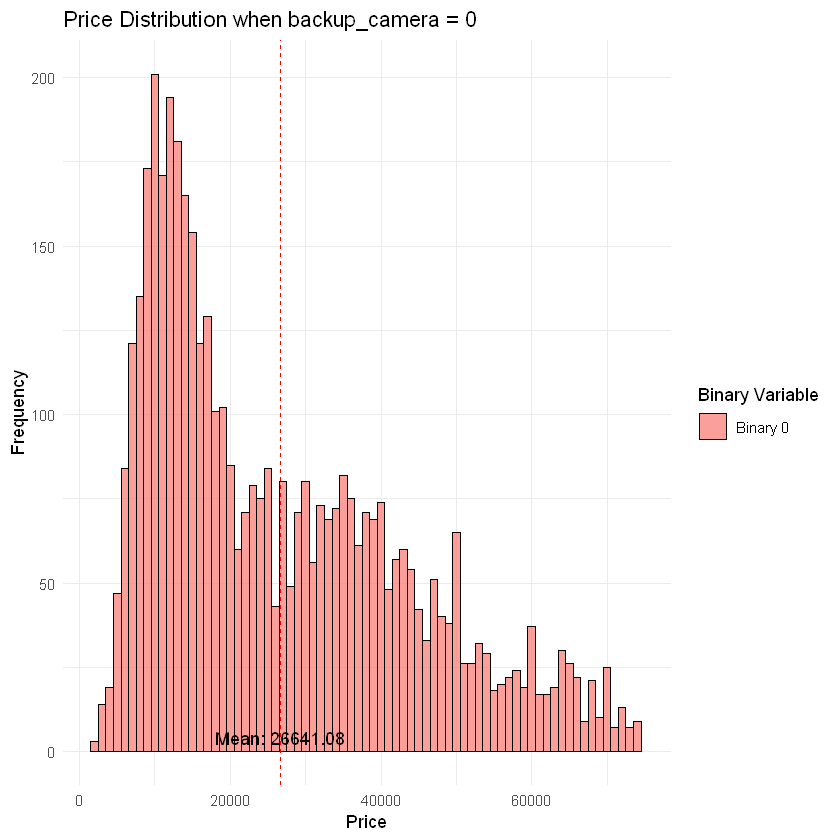

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


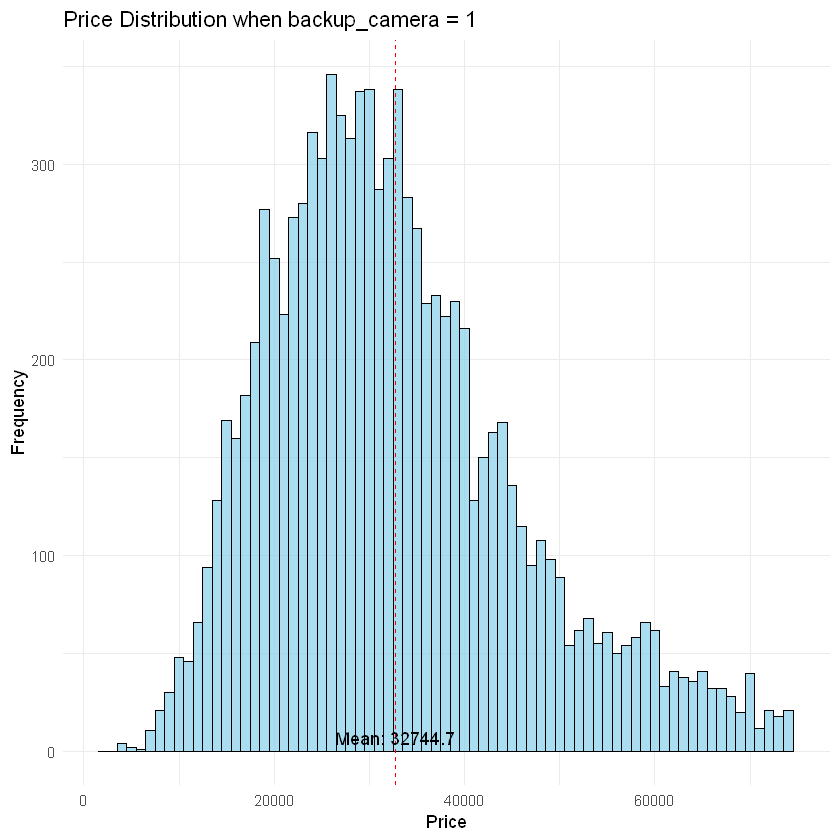

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


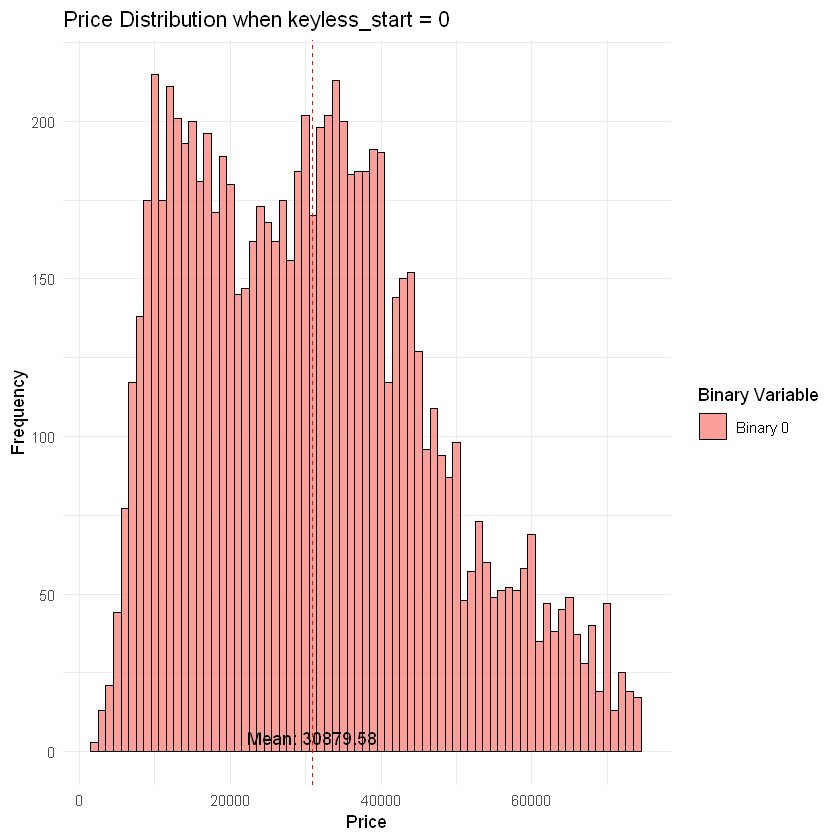

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


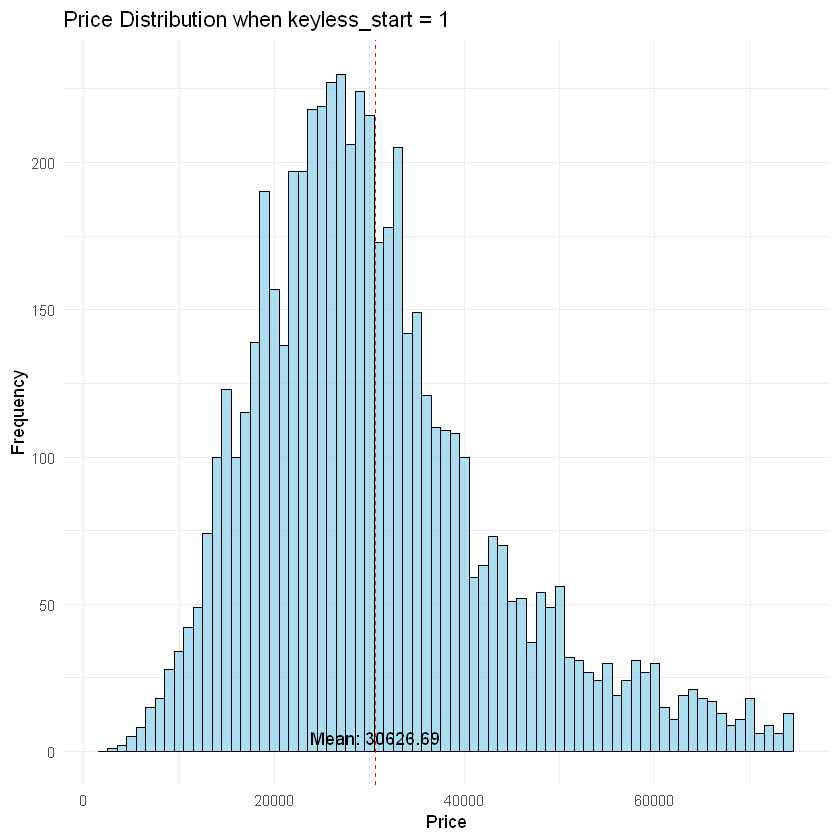

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


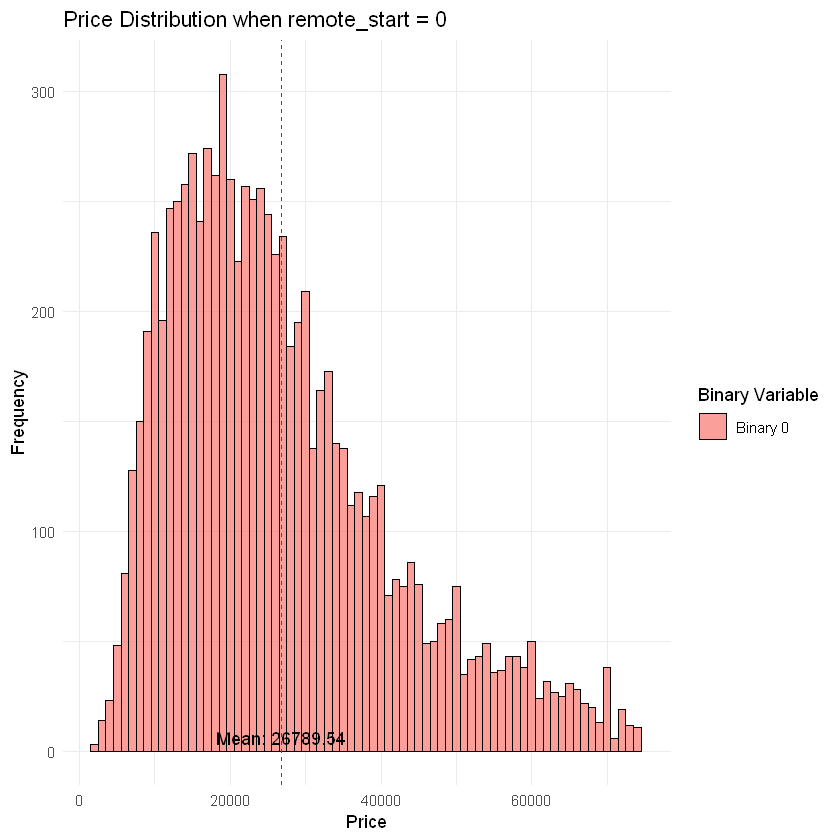

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


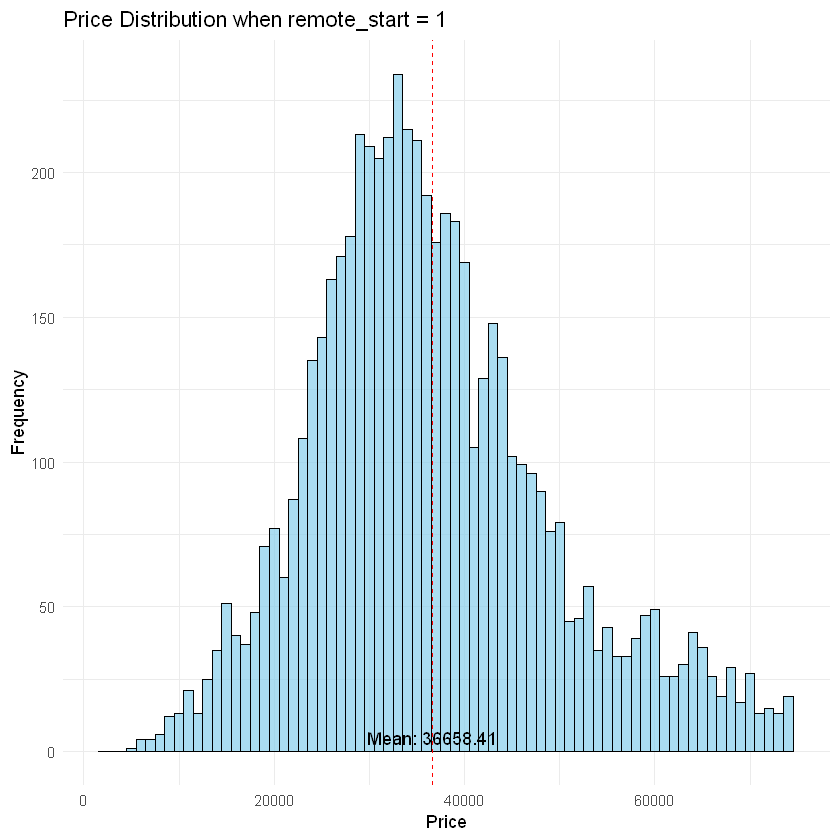

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


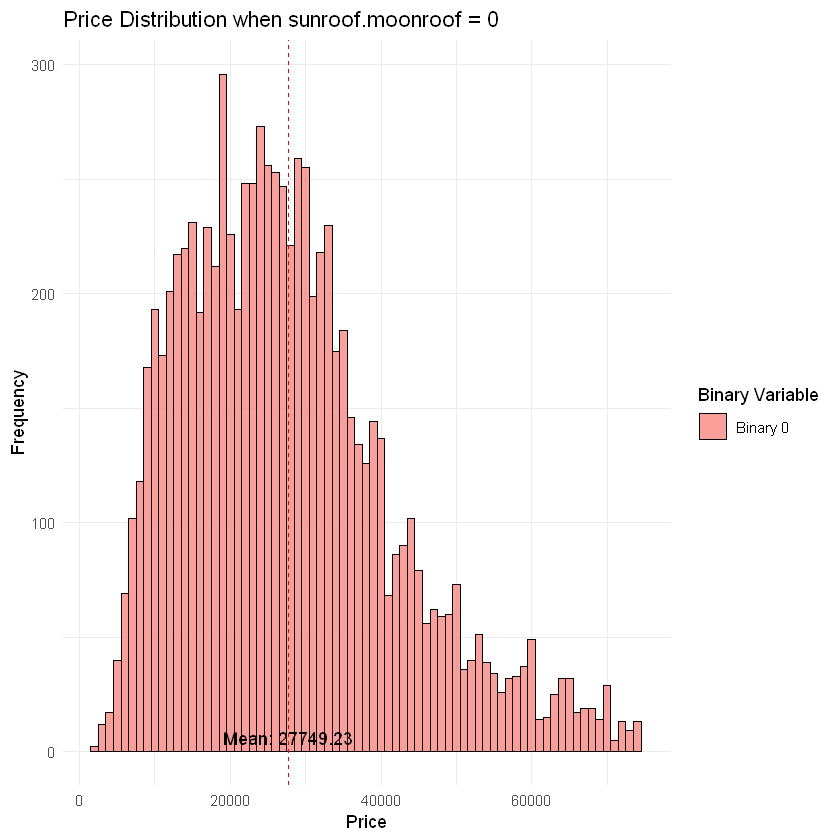

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


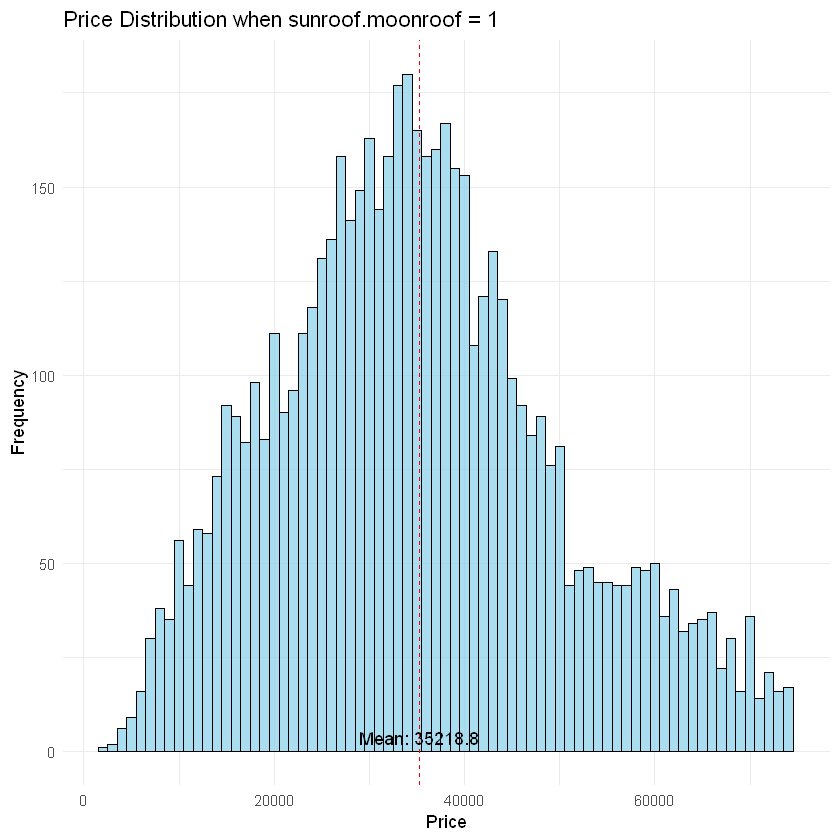

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


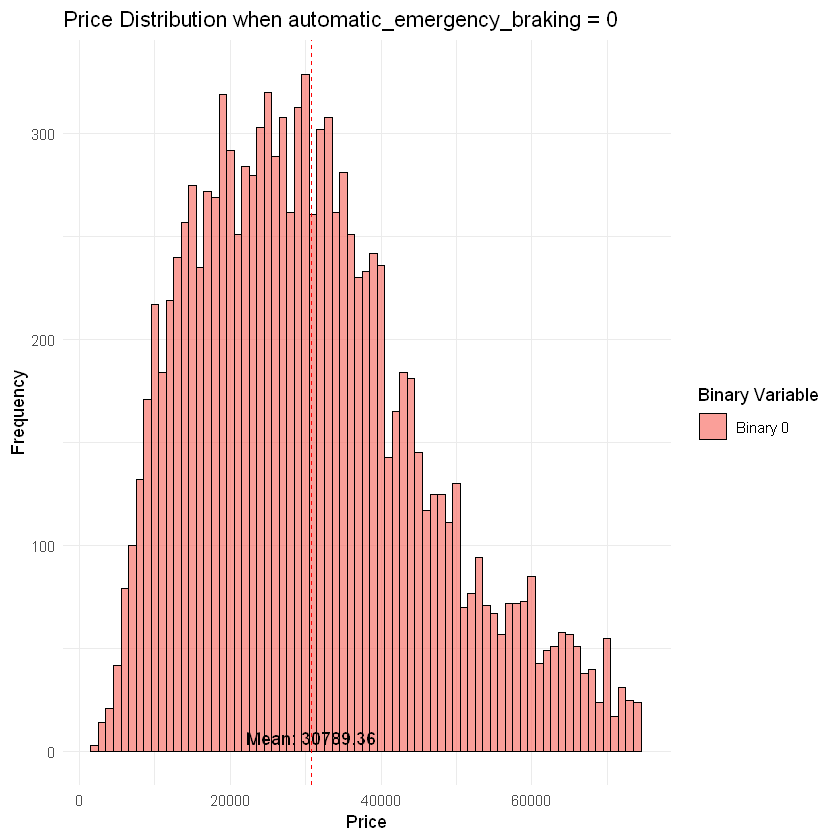

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


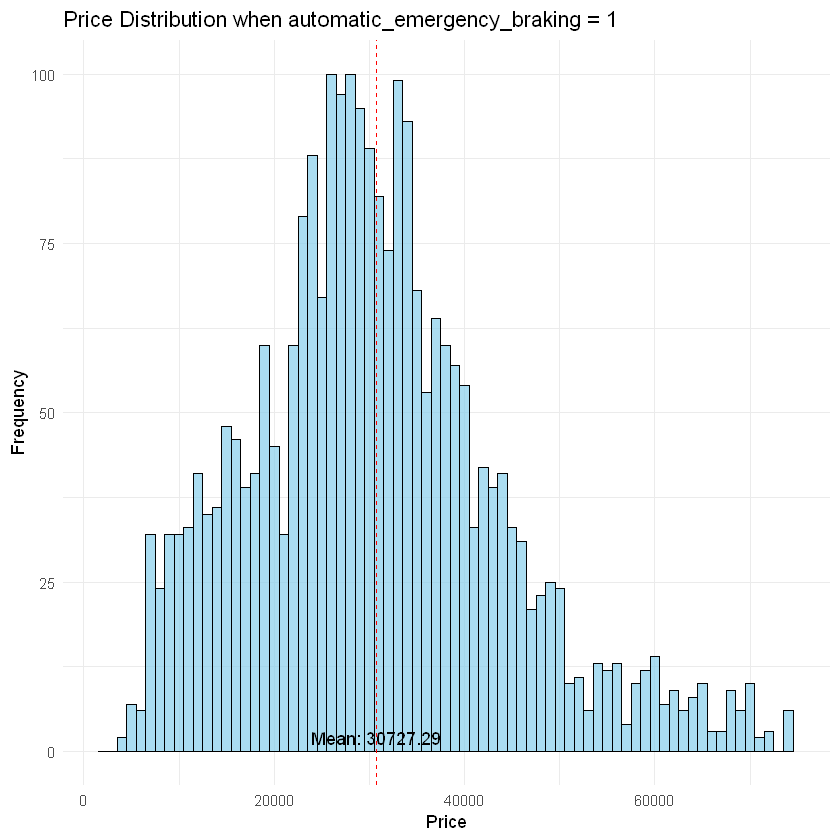

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


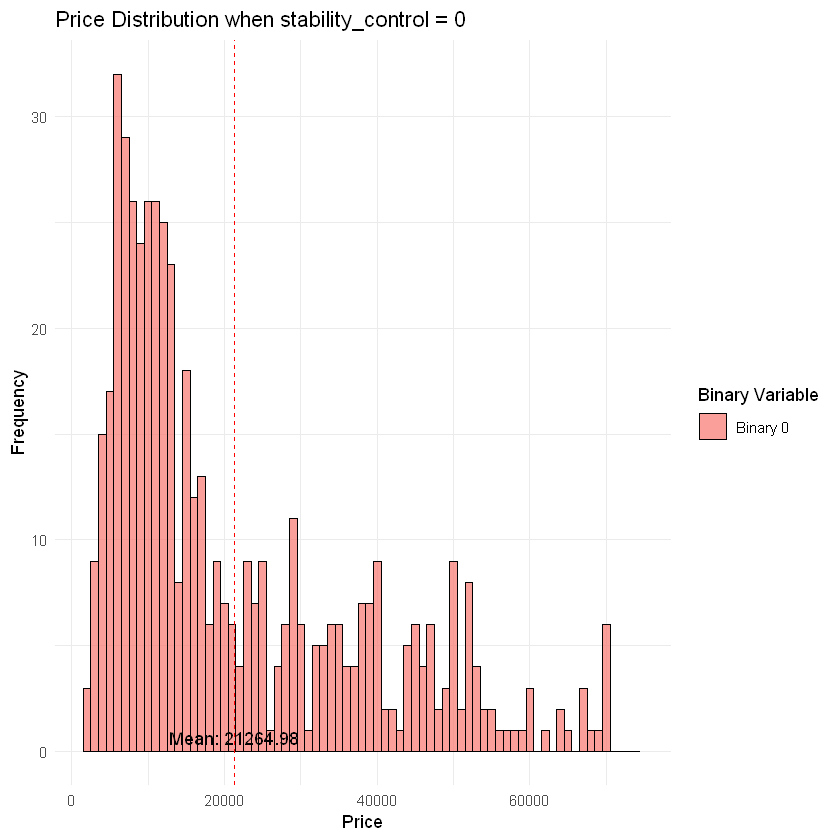

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


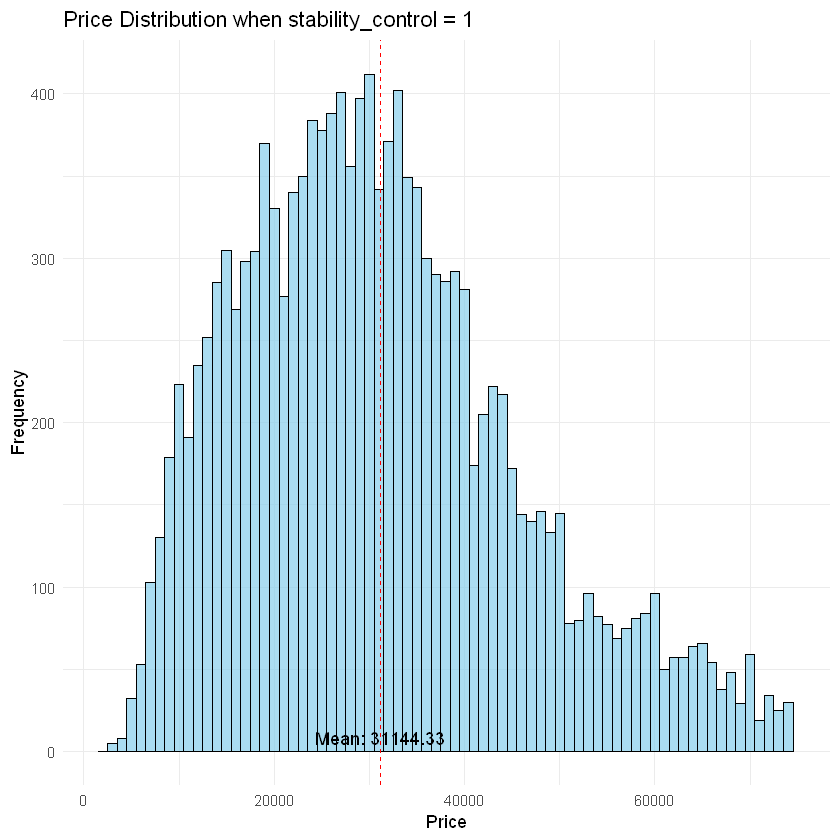

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


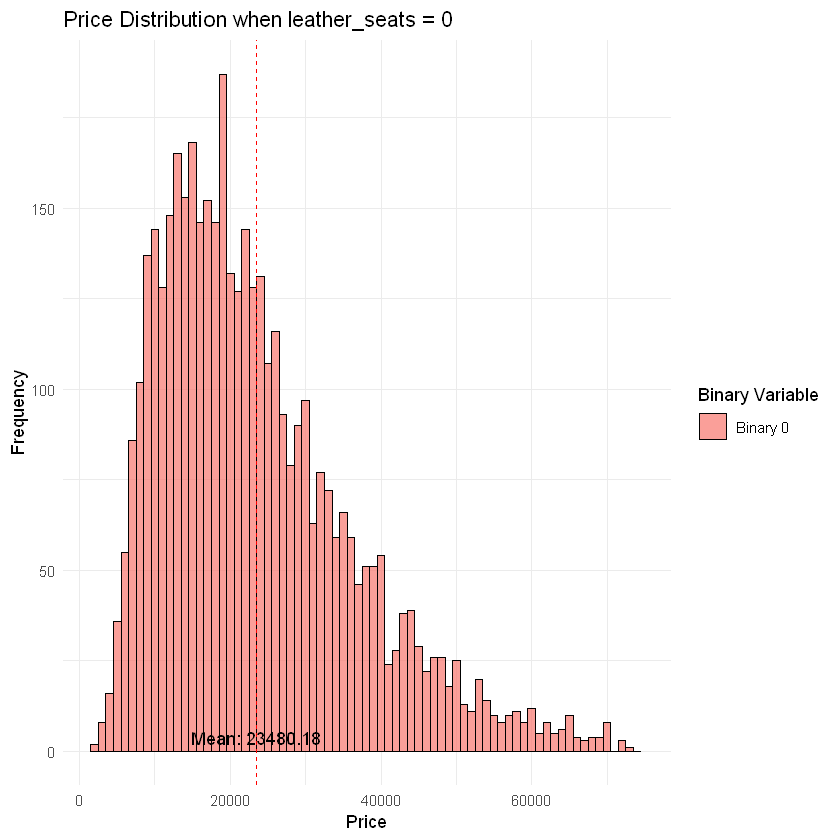

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


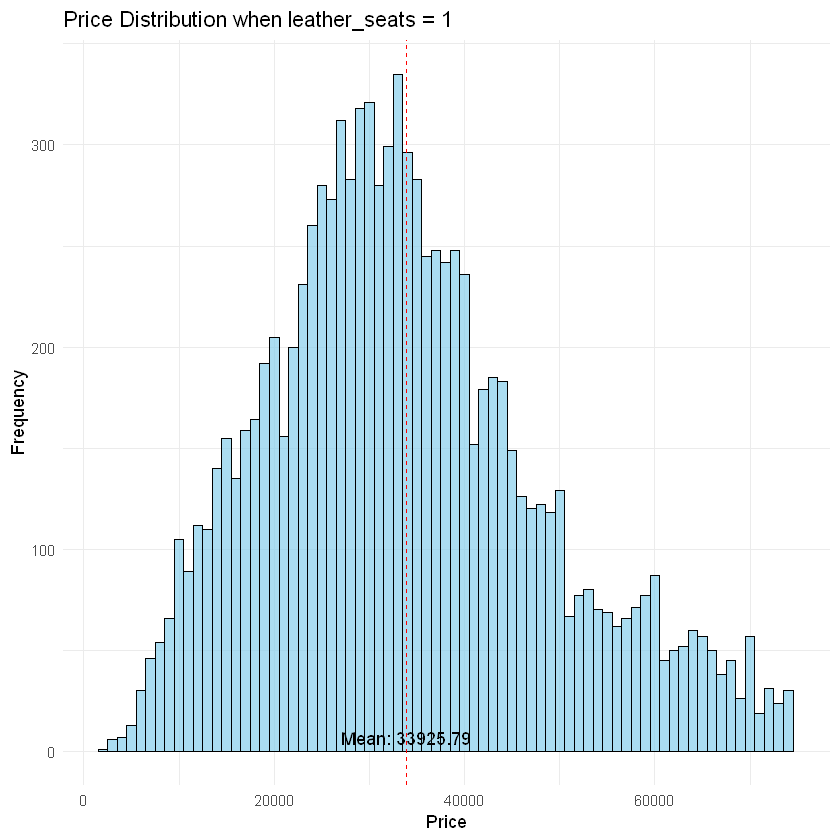

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


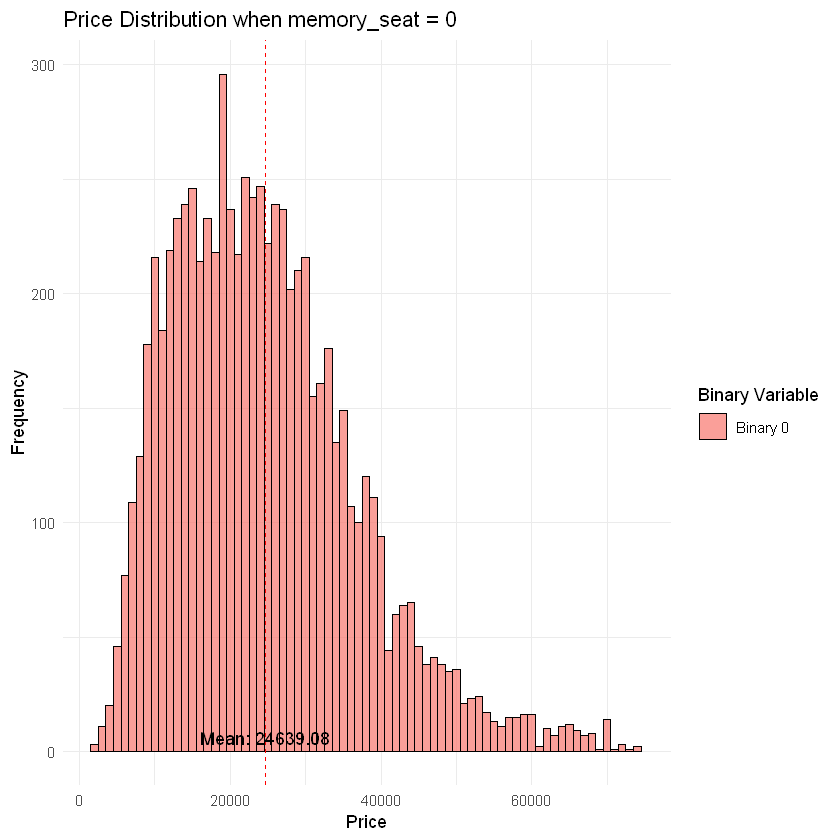

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


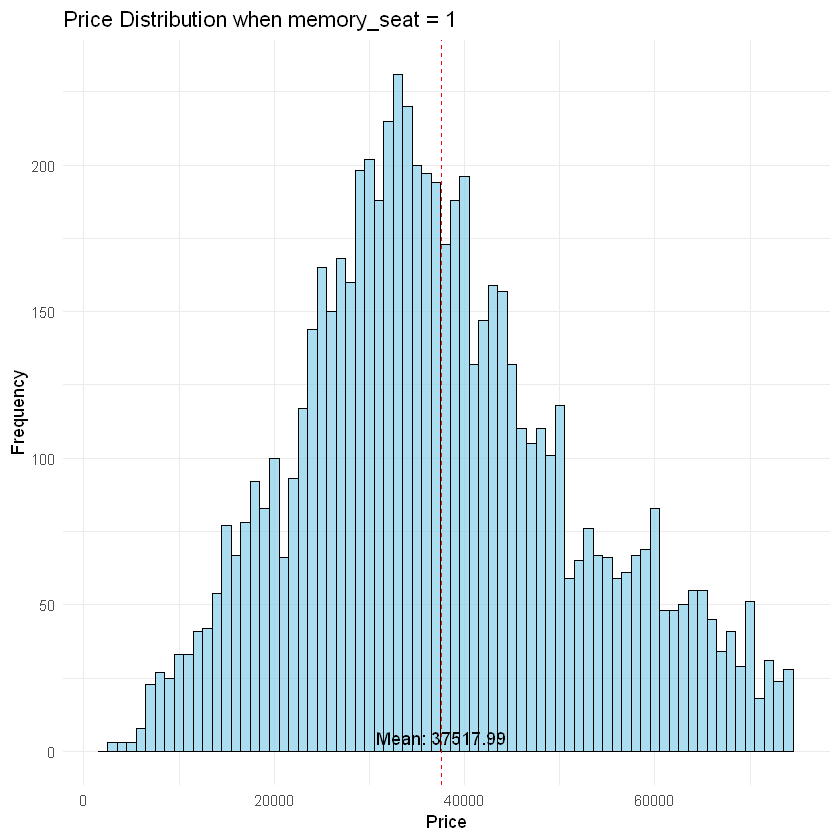

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


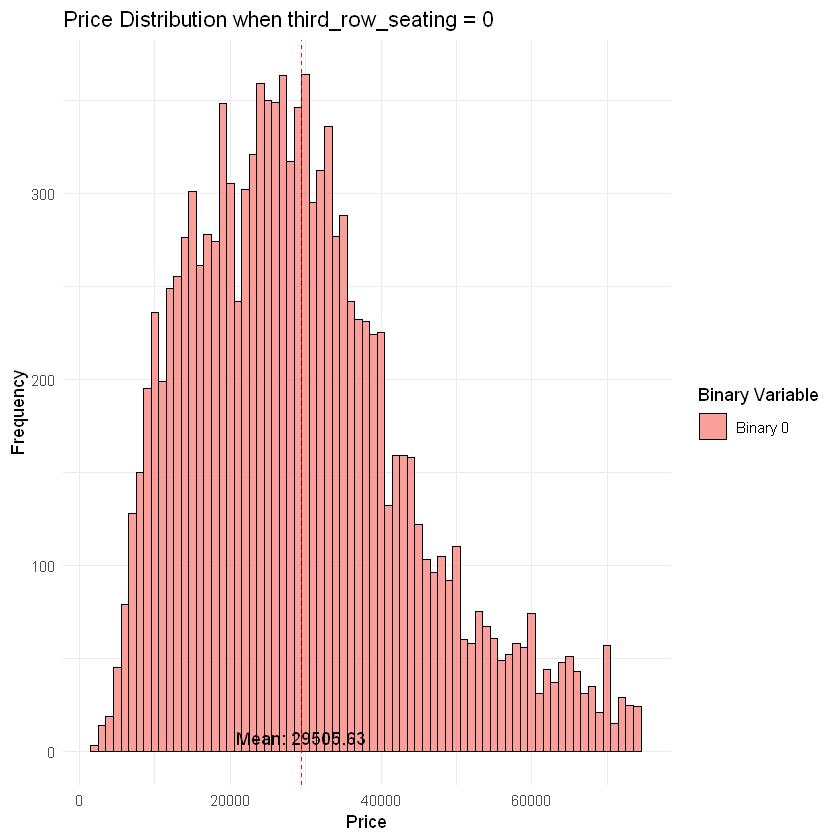

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


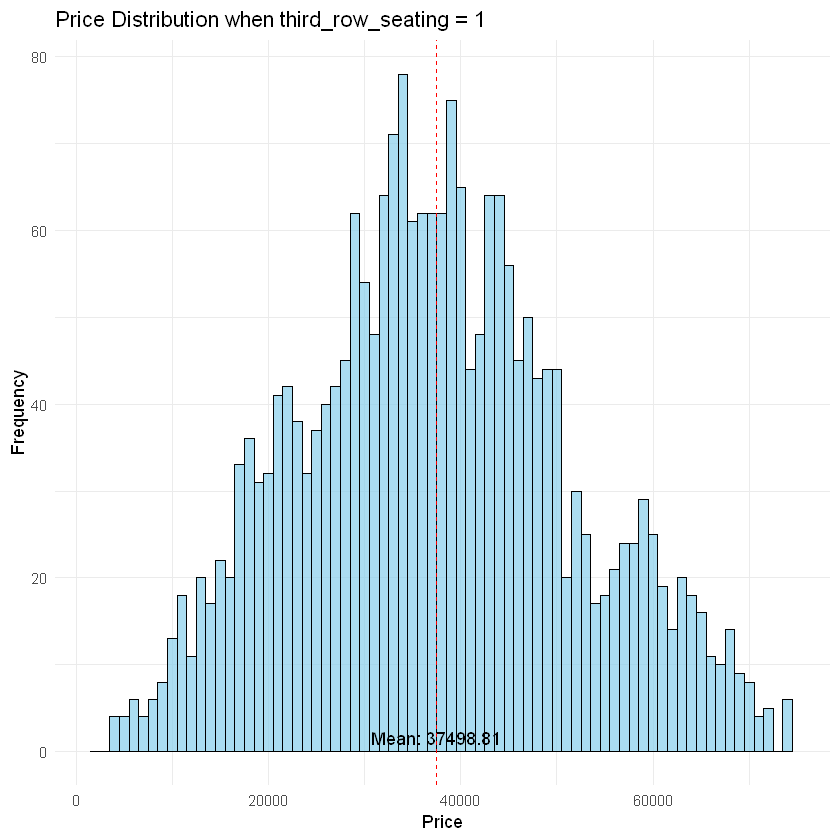

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


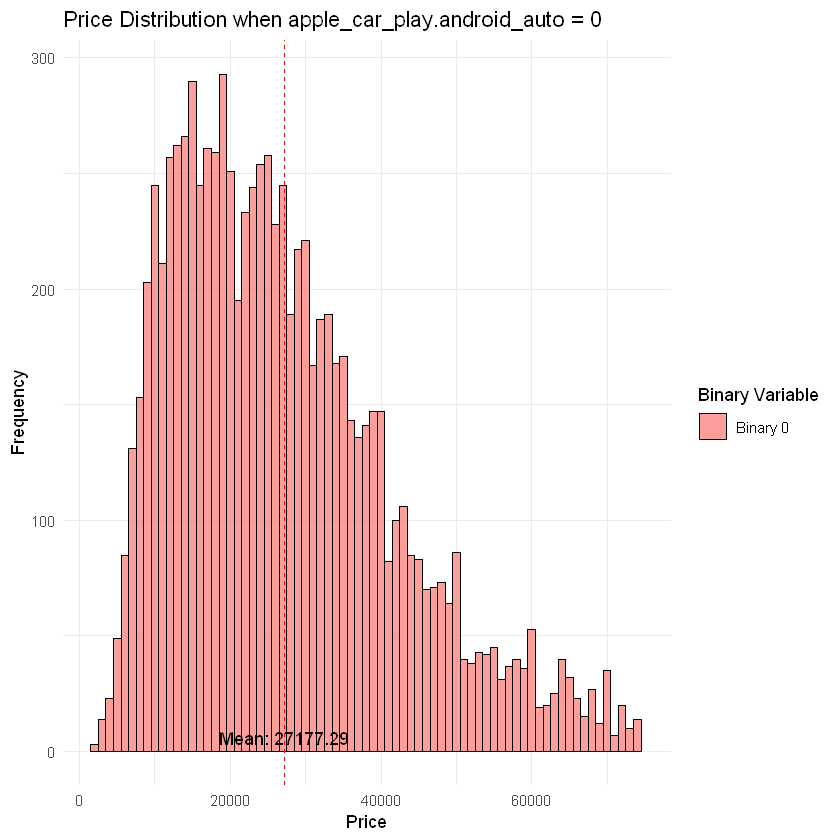

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


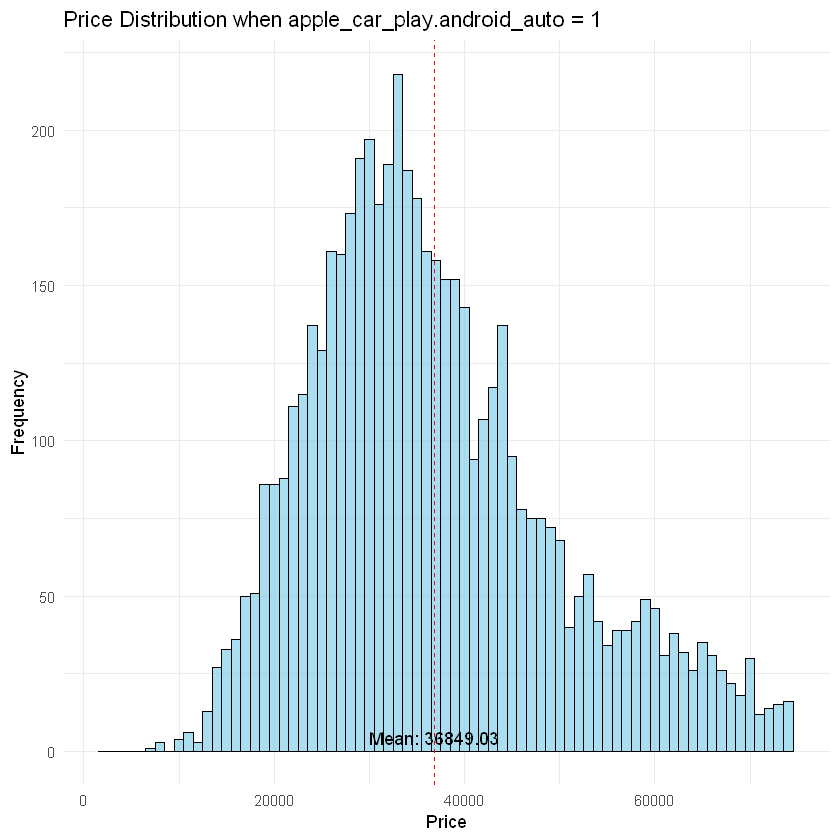

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


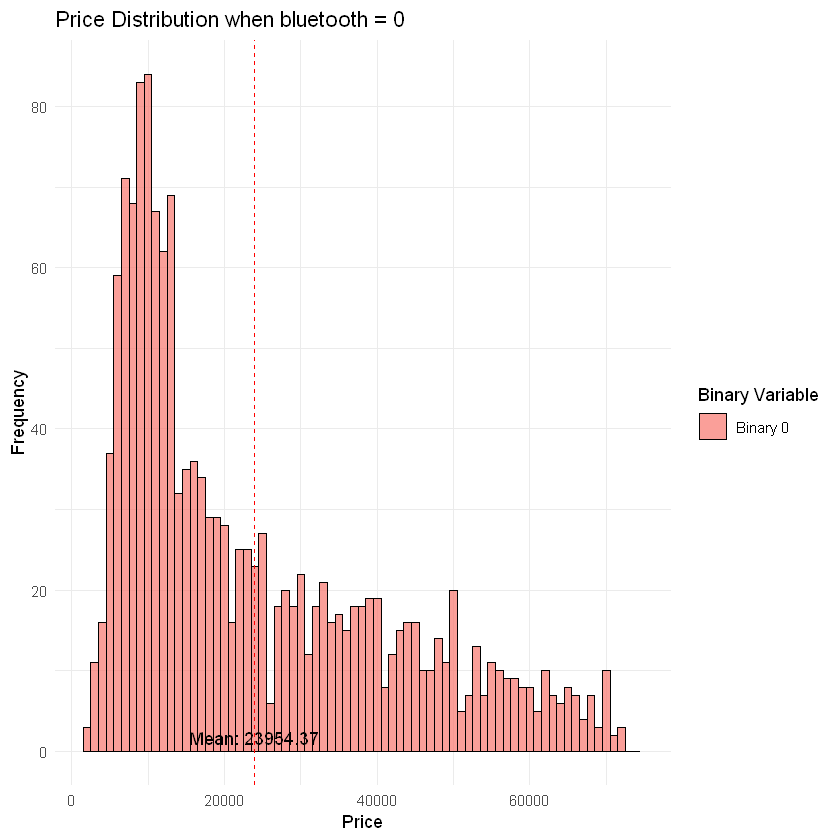

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


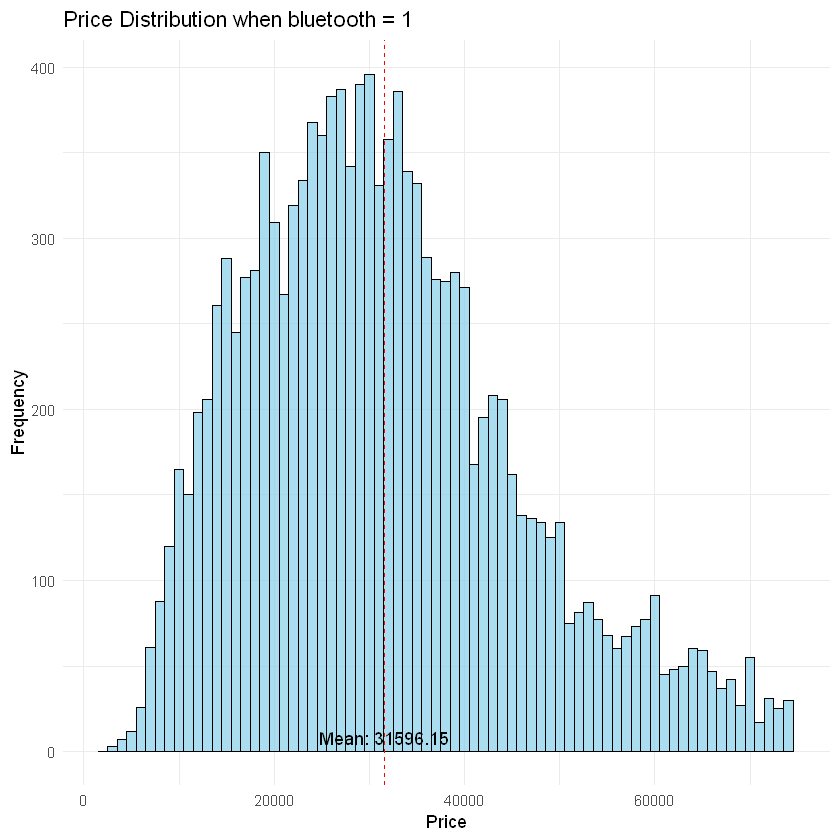

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


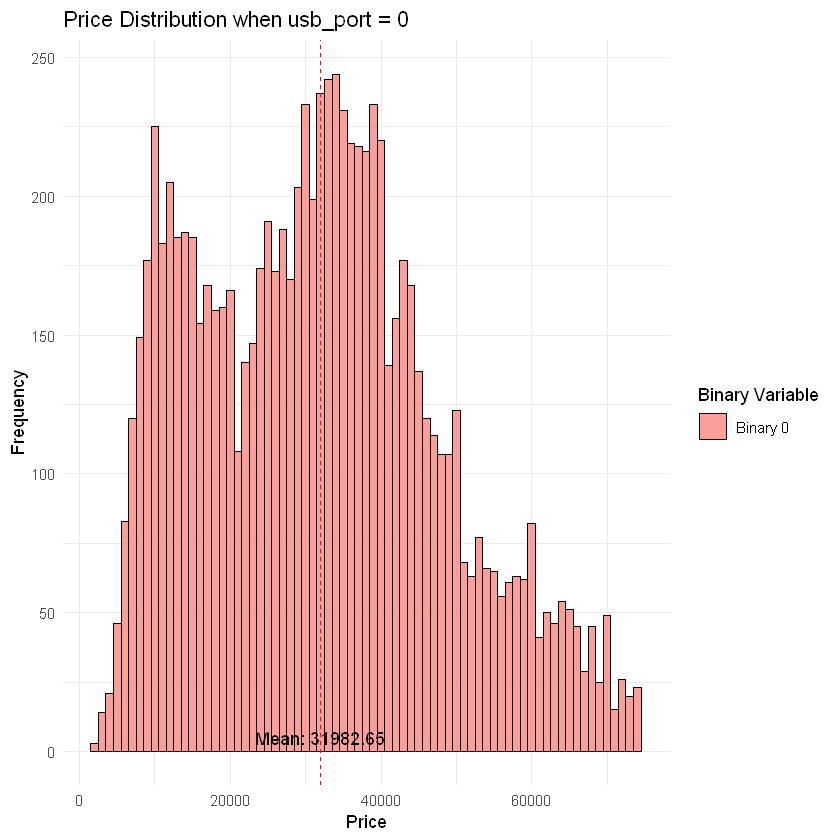

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


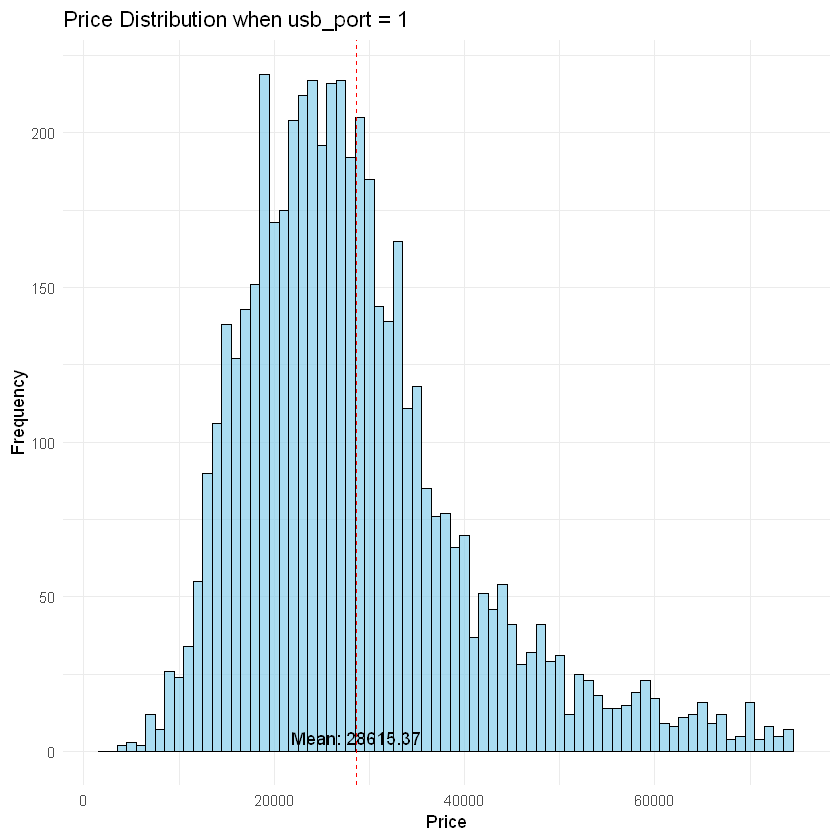

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


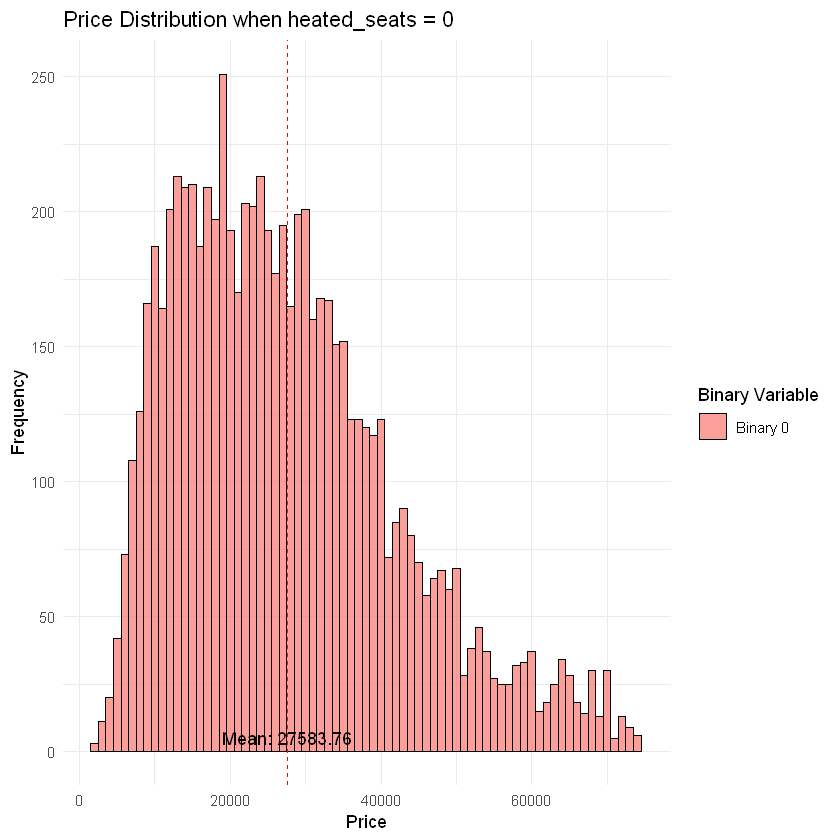

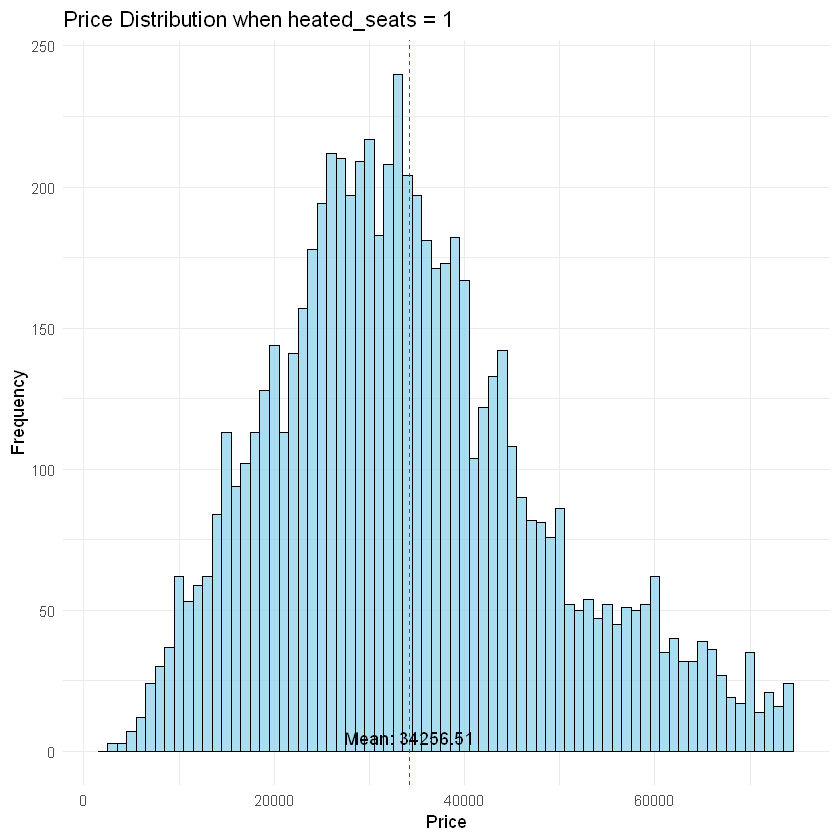

In [21]:
# Assuming 'clean_data' is your data frame, 'binary_vars' contains binary variable names, and 'dependent_var' is the dependent variable
for (col in binary_vars) {
  # Filter data for each binary variable value (0 and 1)
  data_0 <- subset(train_data, train_data[[col]] == 0)
  data_1 <- subset(train_data, train_data[[col]] == 1)
  
  # Determine the common x-axis limits for both histograms
  x_limits <- range(c(data_0$price, data_1$price))
  
  # Calculate mean for each subset
  mean_0 <- mean(data_0$price)
  mean_1 <- mean(data_1$price)
  
  # Create histograms for each binary variable value with common x-axis limits
  hist_0 <- ggplot(data_0, aes(x = price, fill = "Binary 0")) +
    geom_histogram(binwidth = 1000, color = "black", alpha = 0.7) +
    labs(x = "Price", y = "Frequency", fill = "Binary Variable") +
    ggtitle(paste("Price Distribution when", col, "= 0")) +
    theme_minimal() +
    xlim(x_limits) +  # Set x-axis limits
    geom_vline(xintercept = mean_0, color = "red", linetype = "dashed") +  # Add mean line
    annotate("text", x = mean_0, y = 0, vjust = -0.5, label = paste("Mean:", round(mean_0, 2)), color = "black")  # Add mean label
  
  hist_1 <- ggplot(data_1, aes(x = price, fill = "Binary 1")) +
    geom_histogram(binwidth = 1000, color = "black", fill = "skyblue", alpha = 0.7) +
    labs(x = "Price", y = "Frequency", fill = "Binary Variable") +
    ggtitle(paste("Price Distribution when", col, "= 1")) +
    theme_minimal() +
    xlim(x_limits) +  # Set x-axis limits
    geom_vline(xintercept = mean_1, color = "red", linetype = "dashed") +  # Add mean line
    annotate("text", x = mean_1, y = 0, vjust = -0.5, label = paste("Mean:", round(mean_1, 2)), color = "black")  # Add mean label
  
  # Print the histograms for each binary variable value with the same scale on x-axis
  print(hist_0)
  print(hist_1)
}

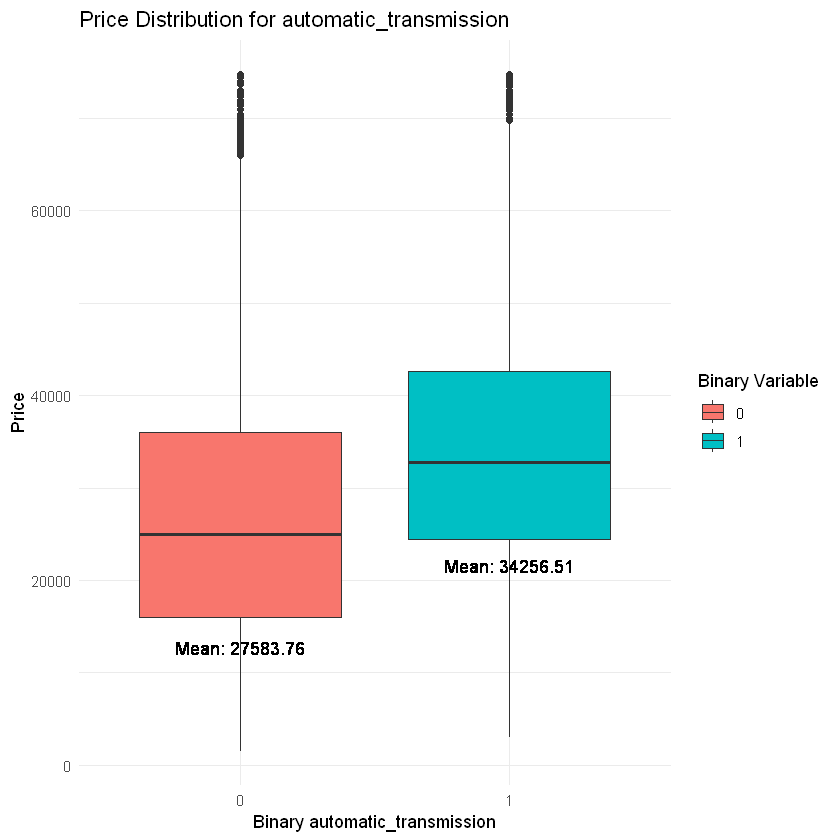

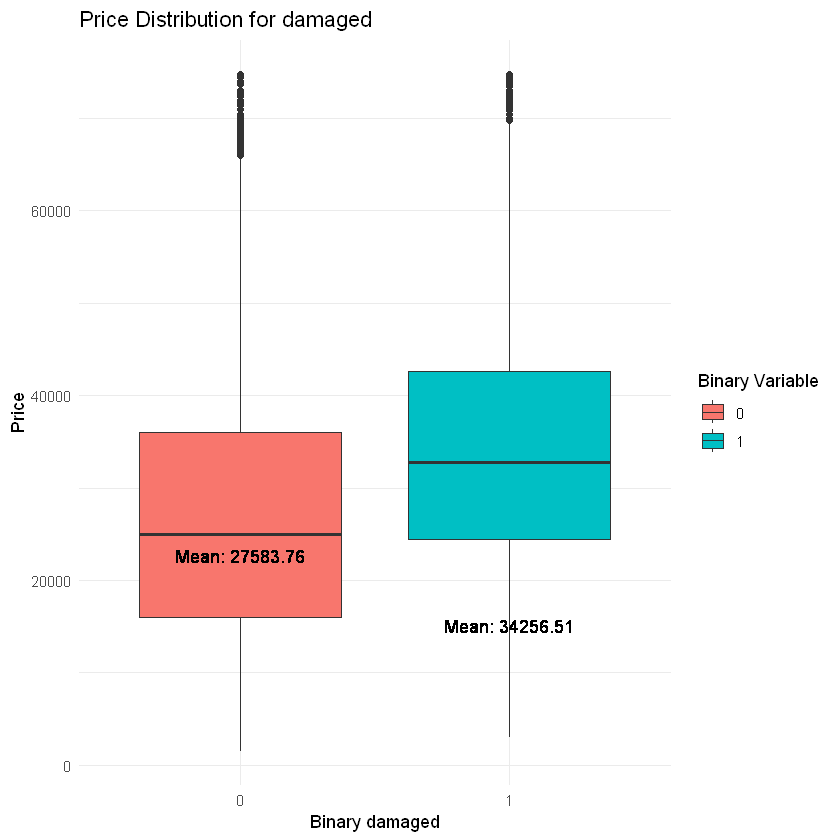

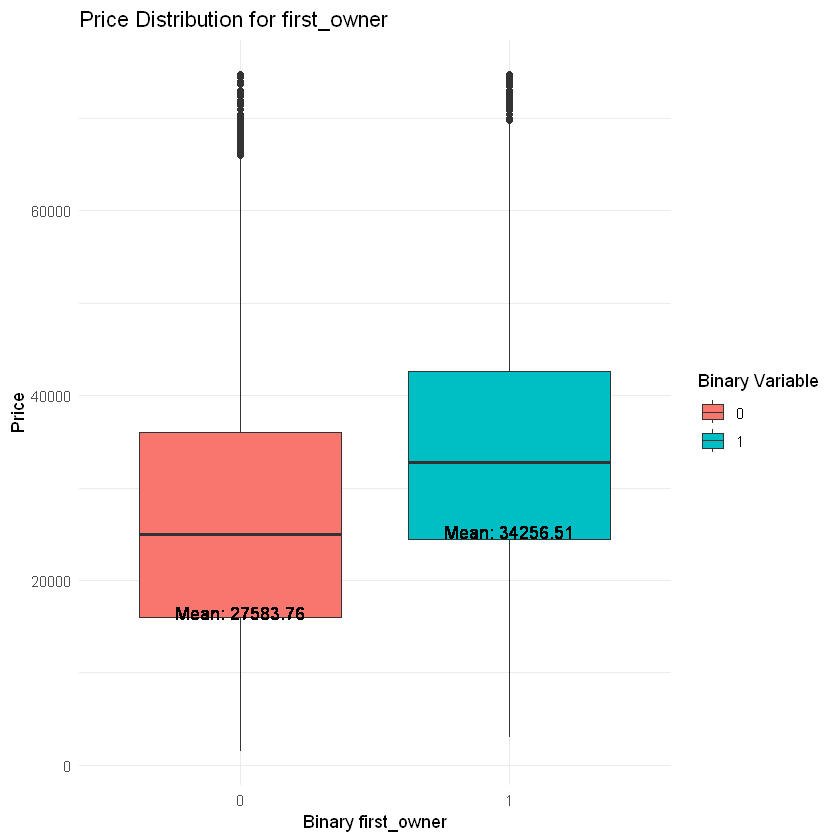

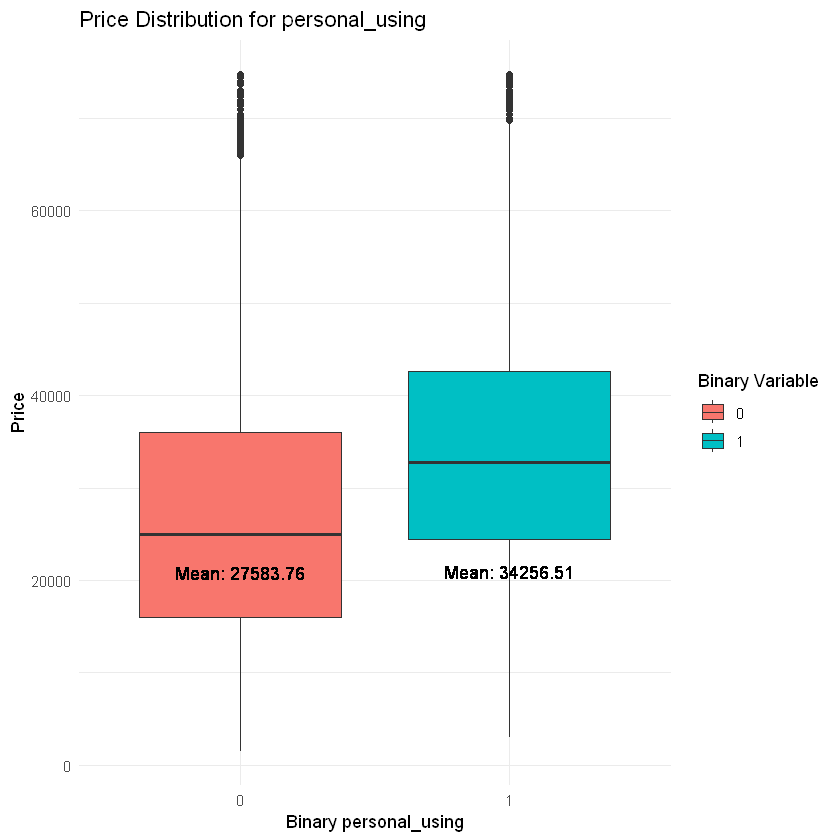

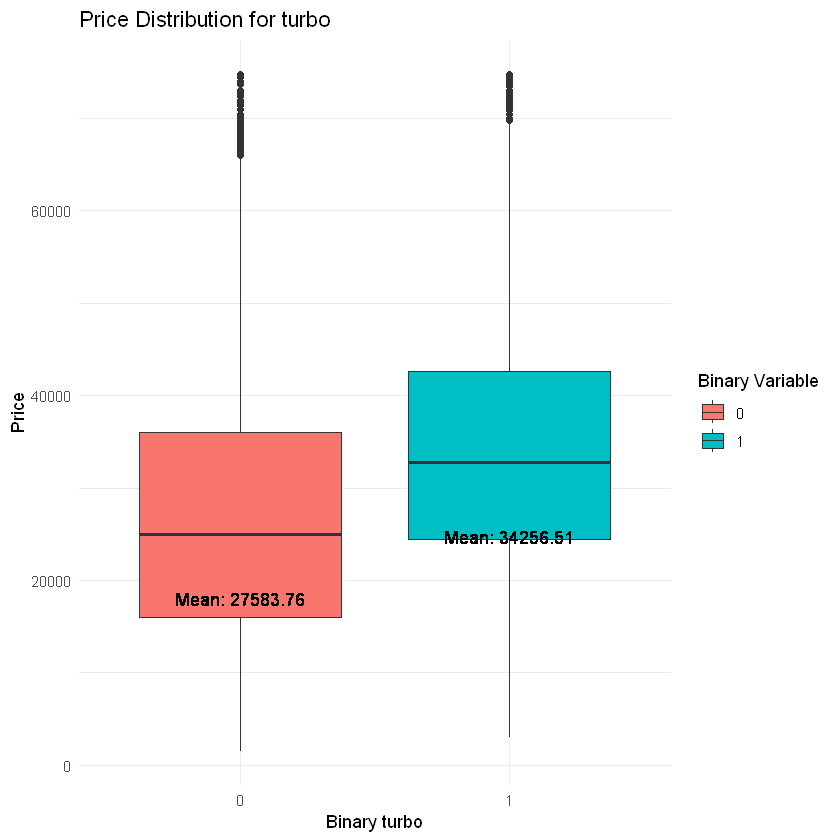

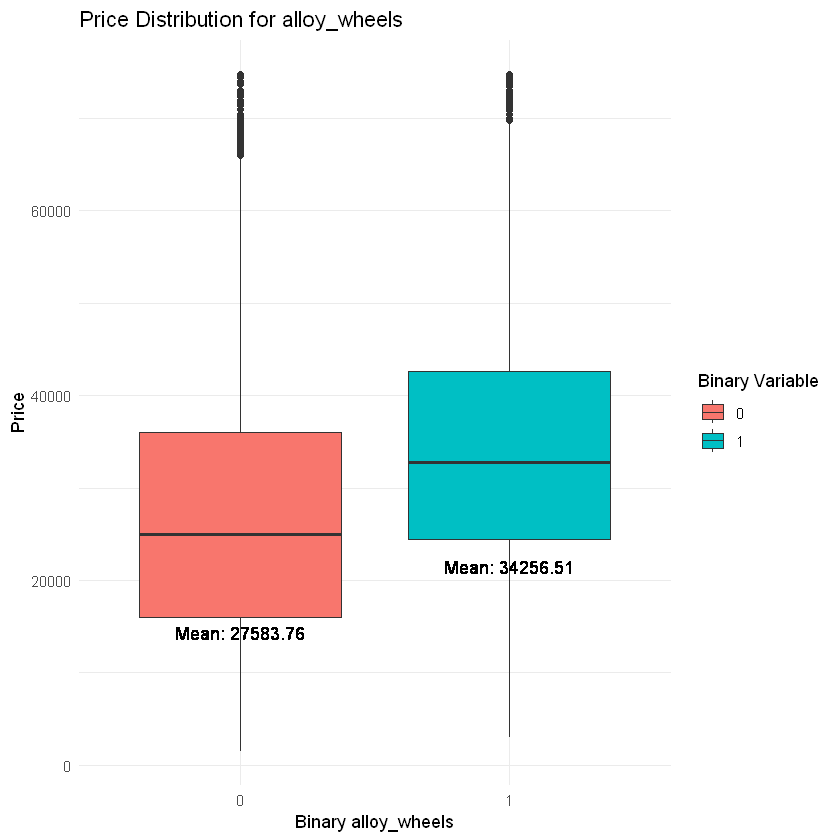

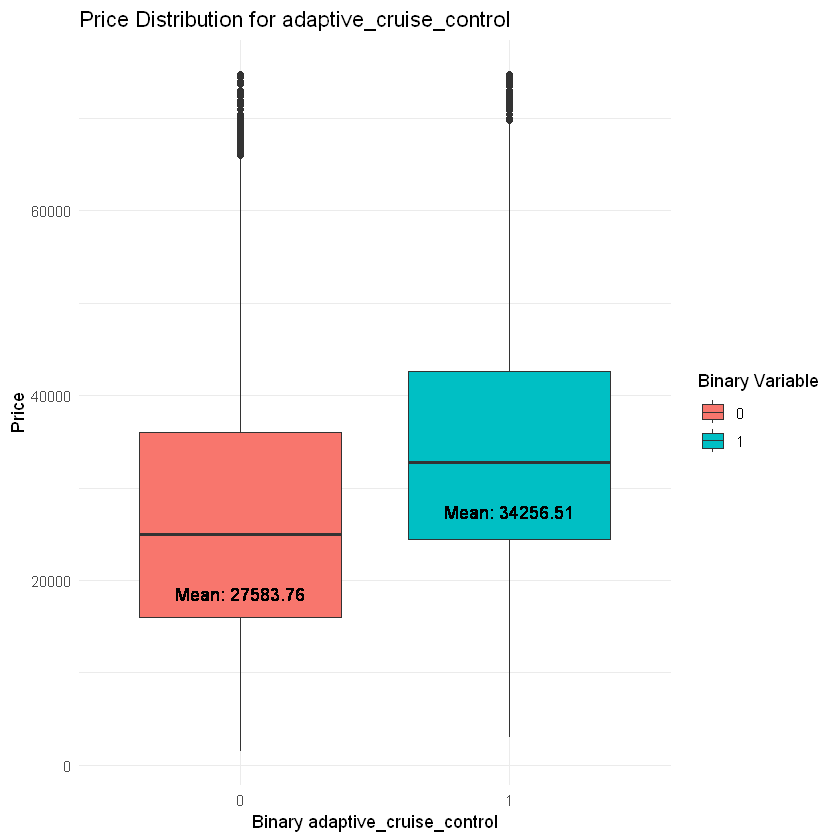

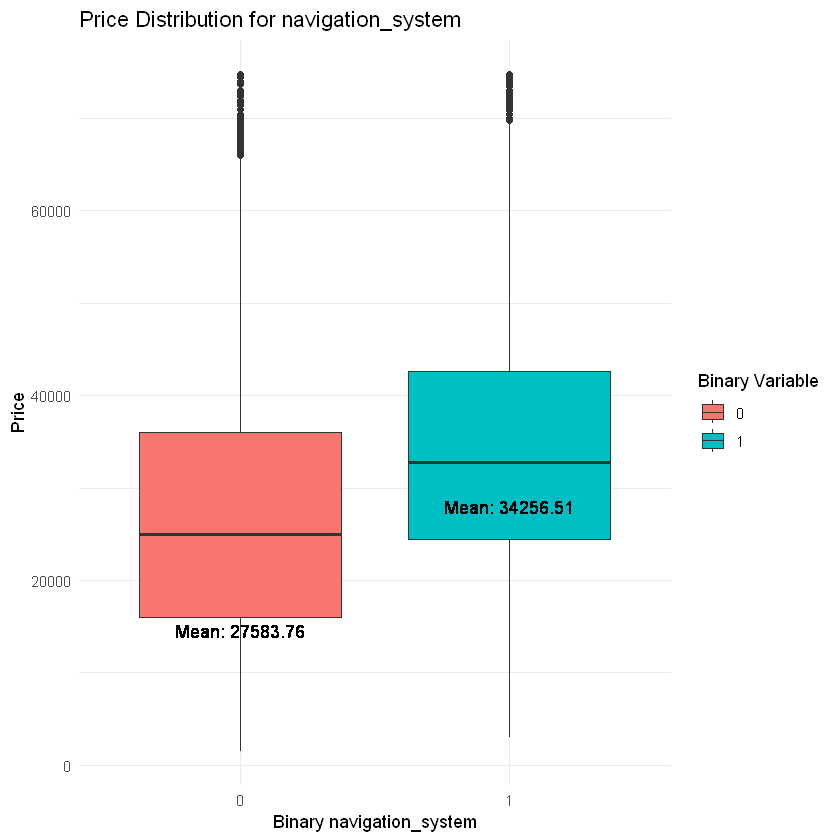

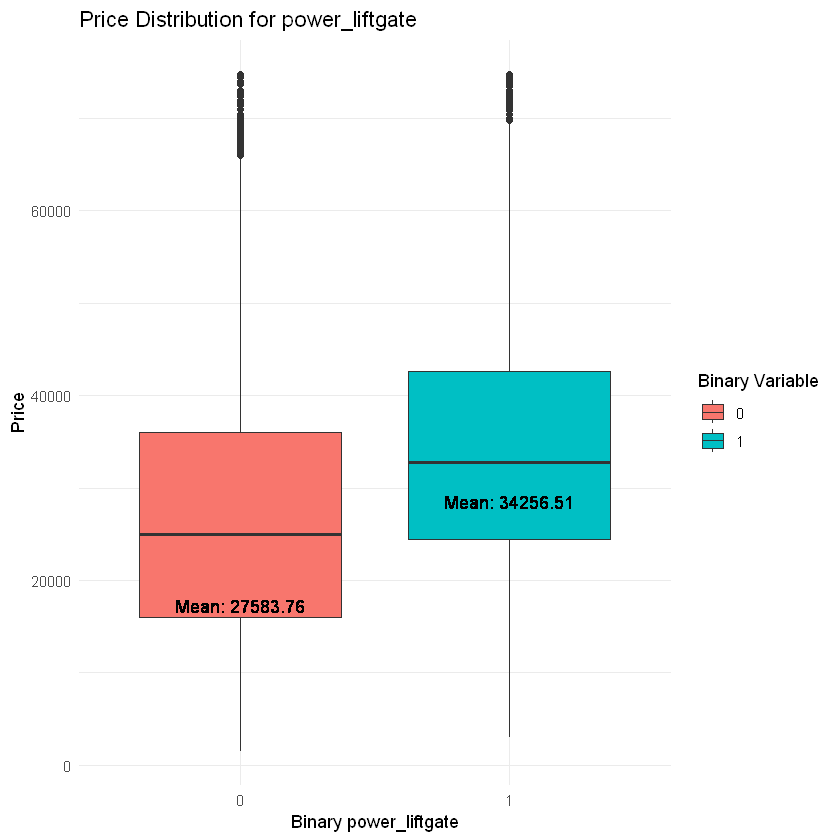

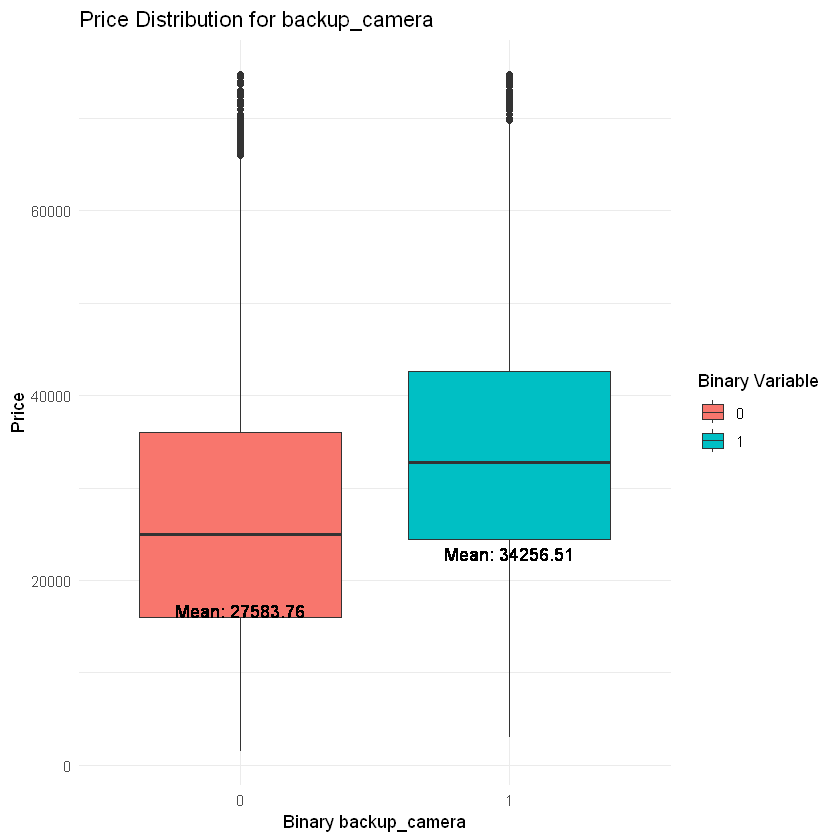

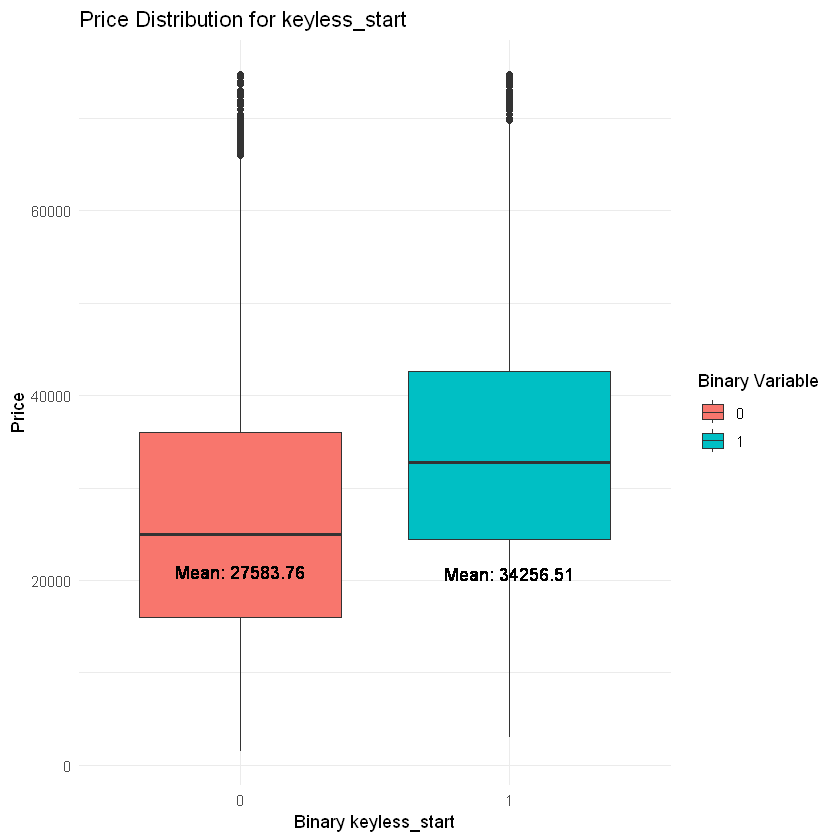

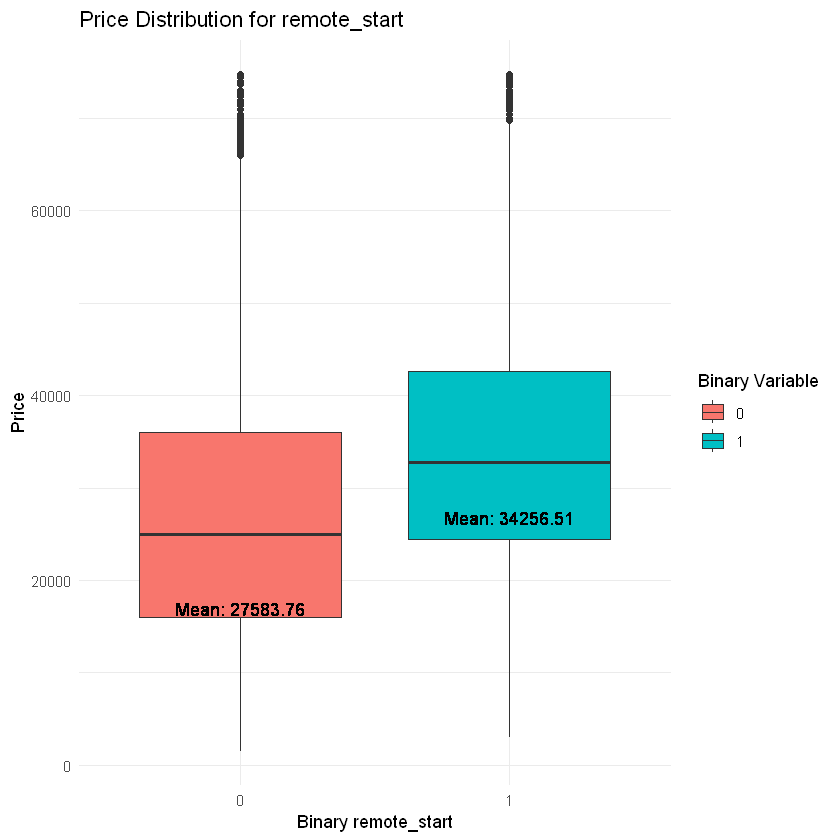

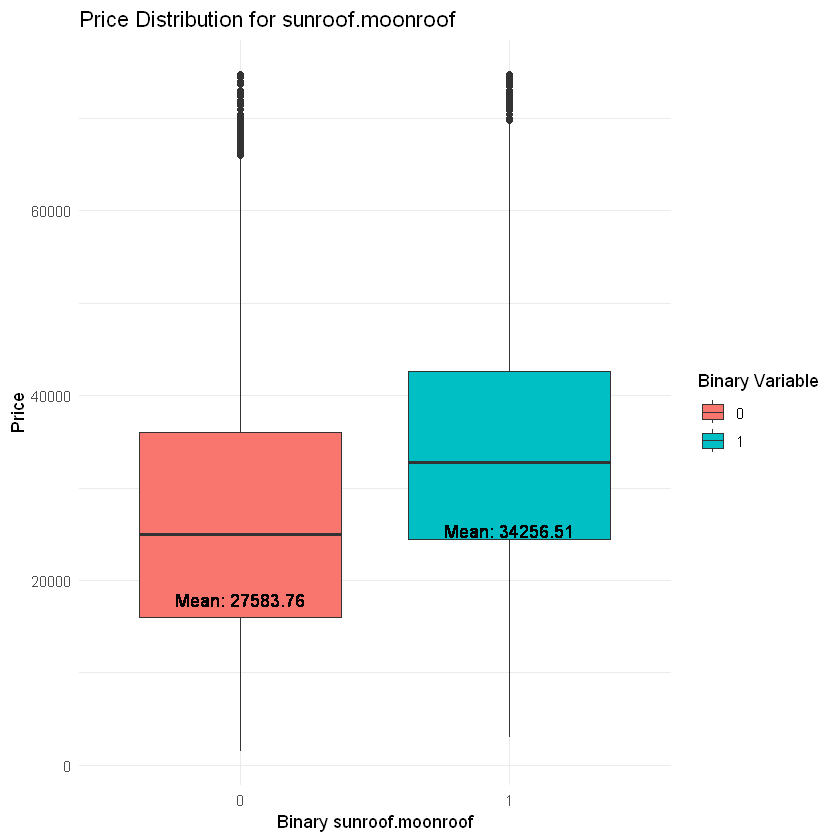

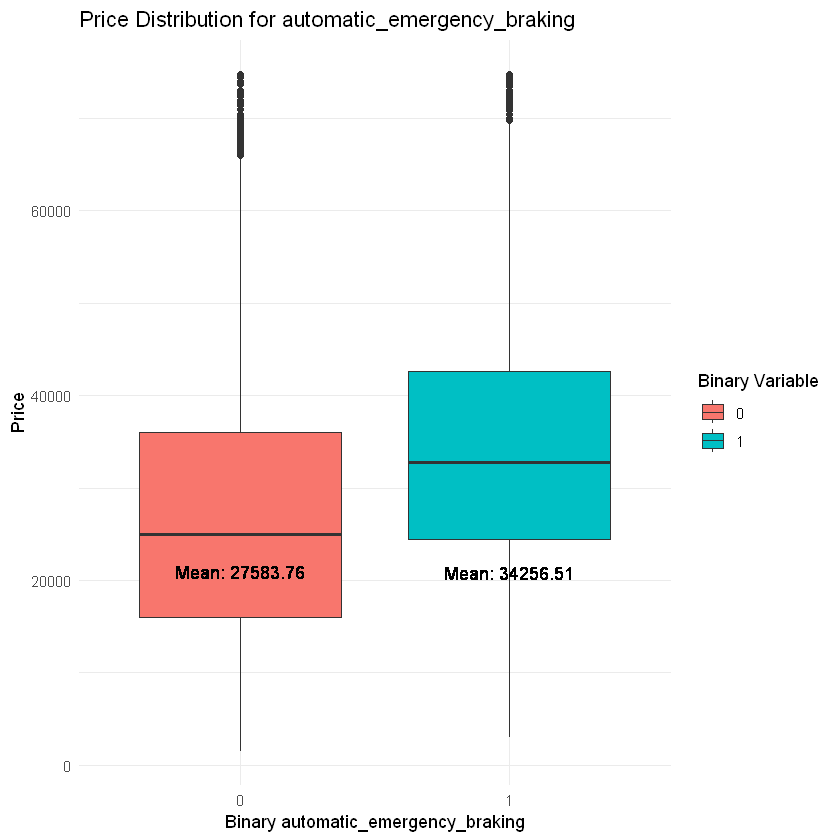

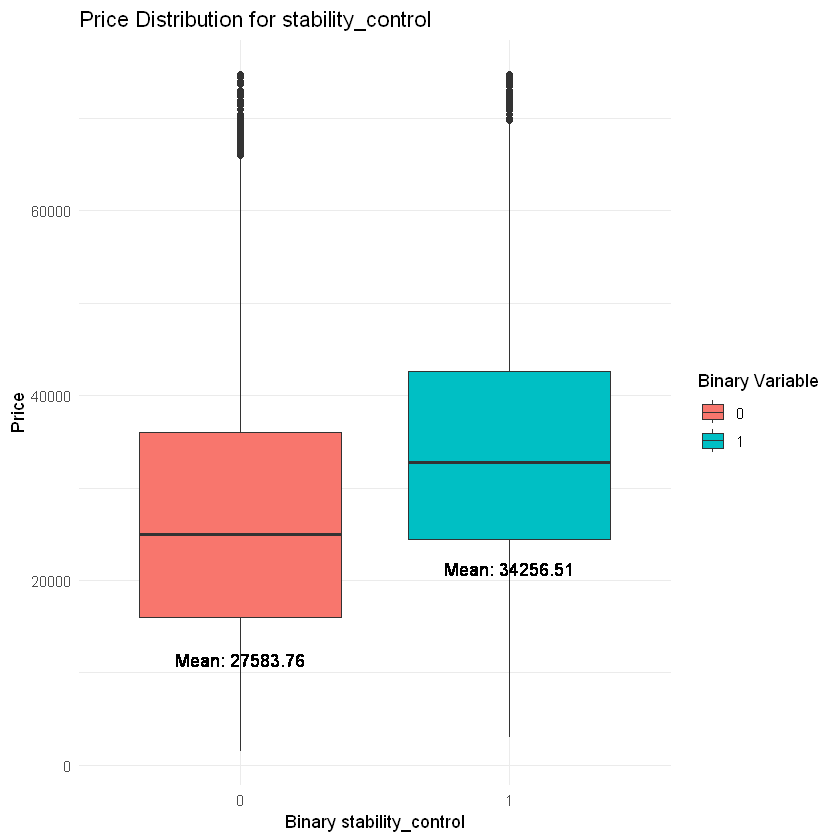

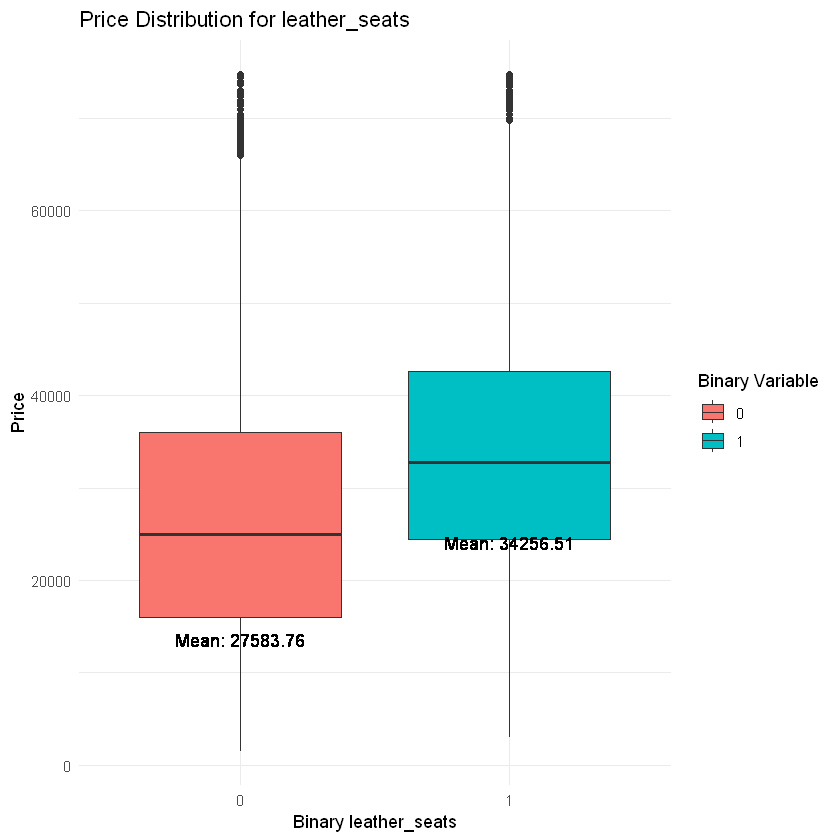

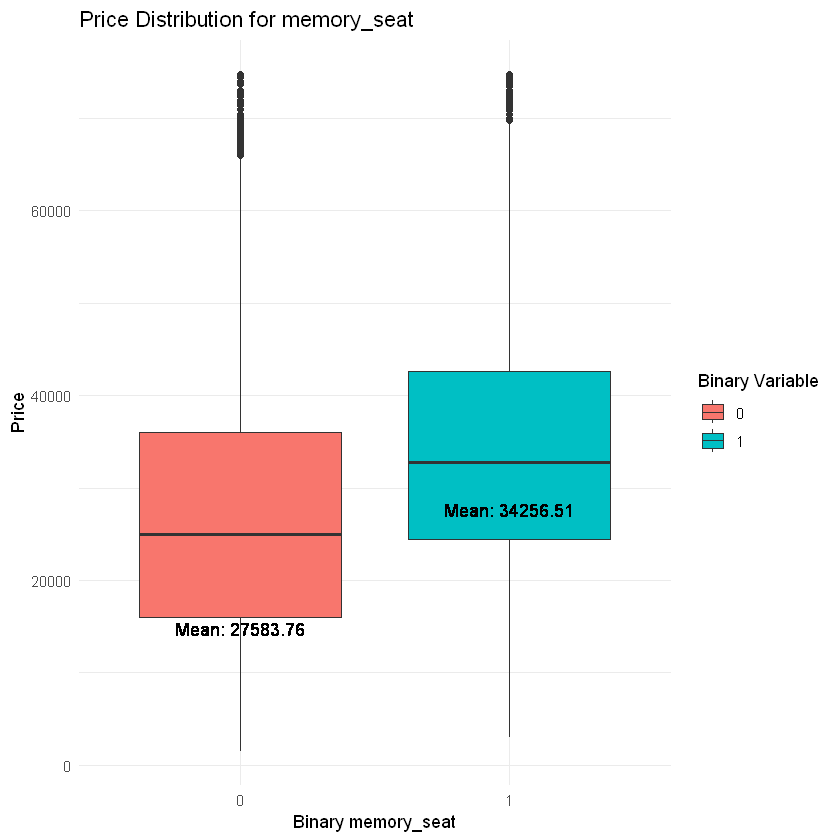

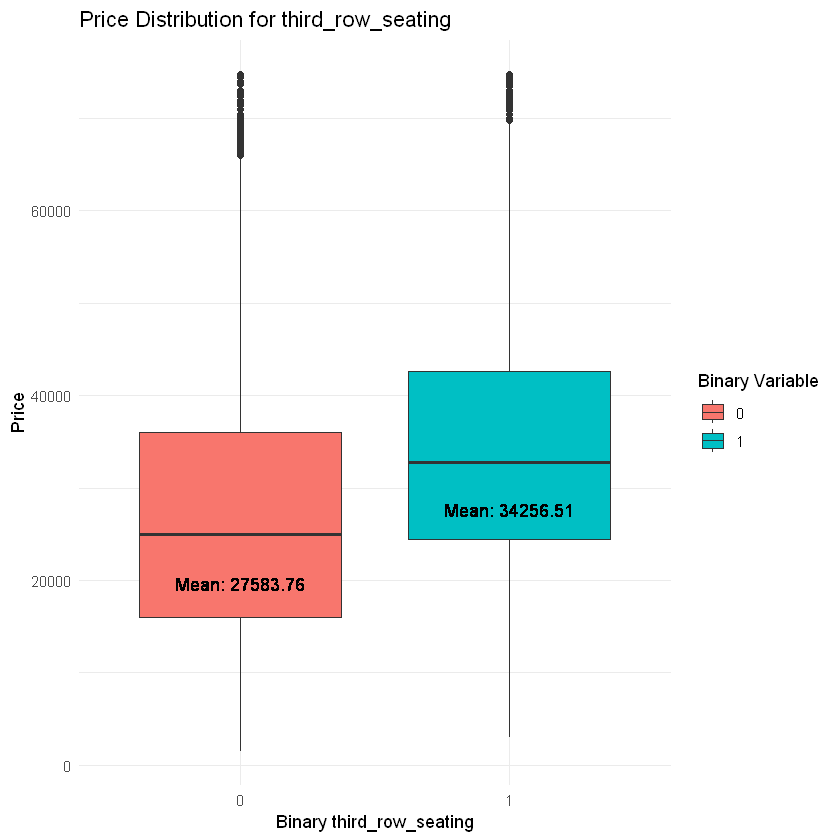

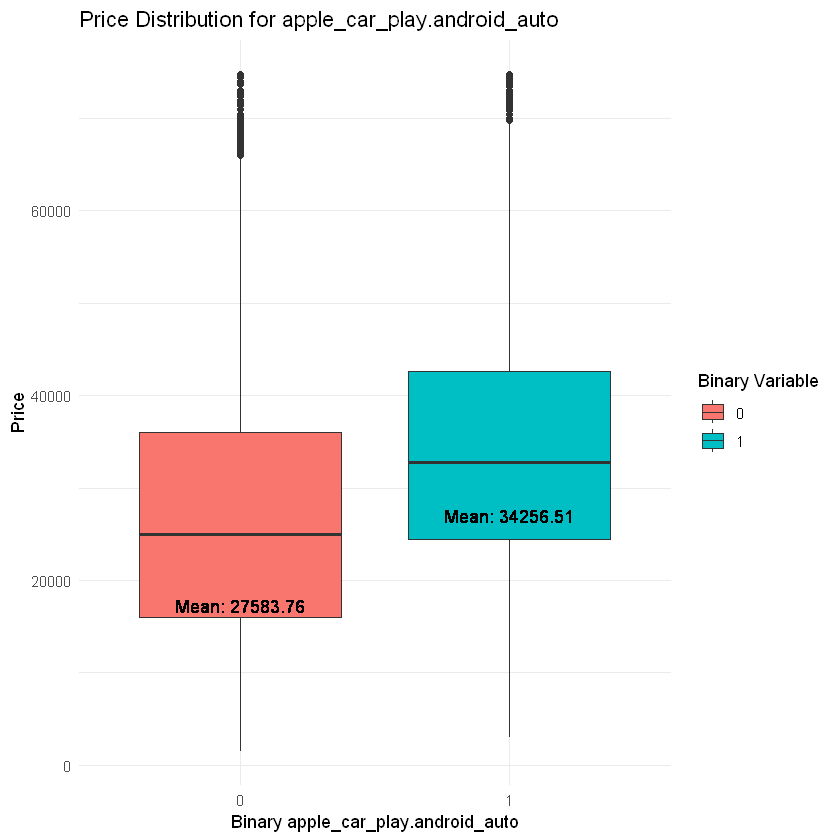

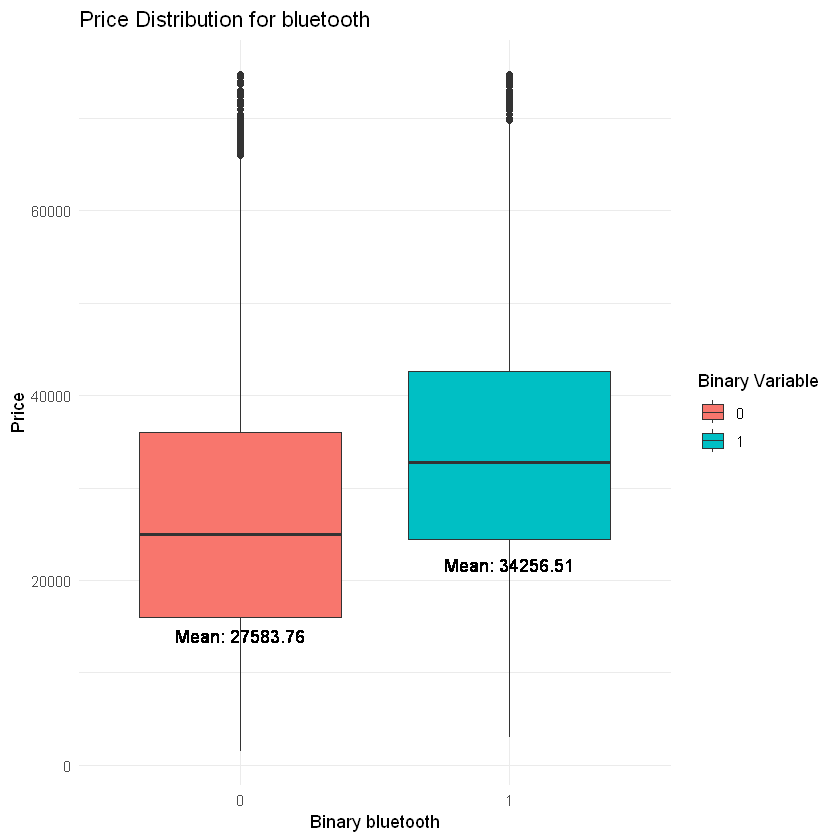

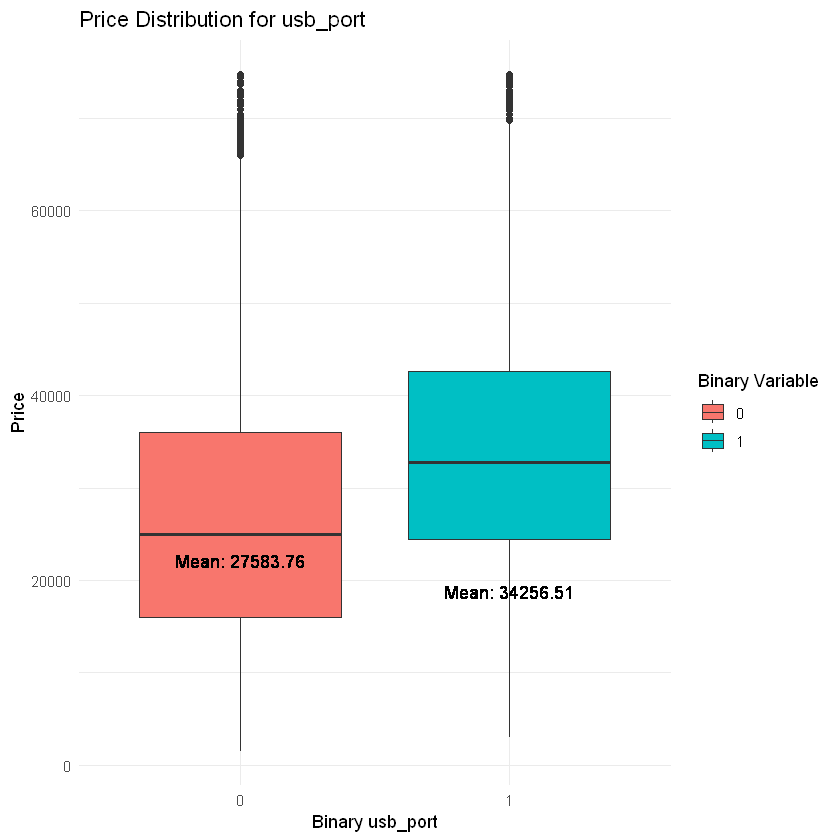

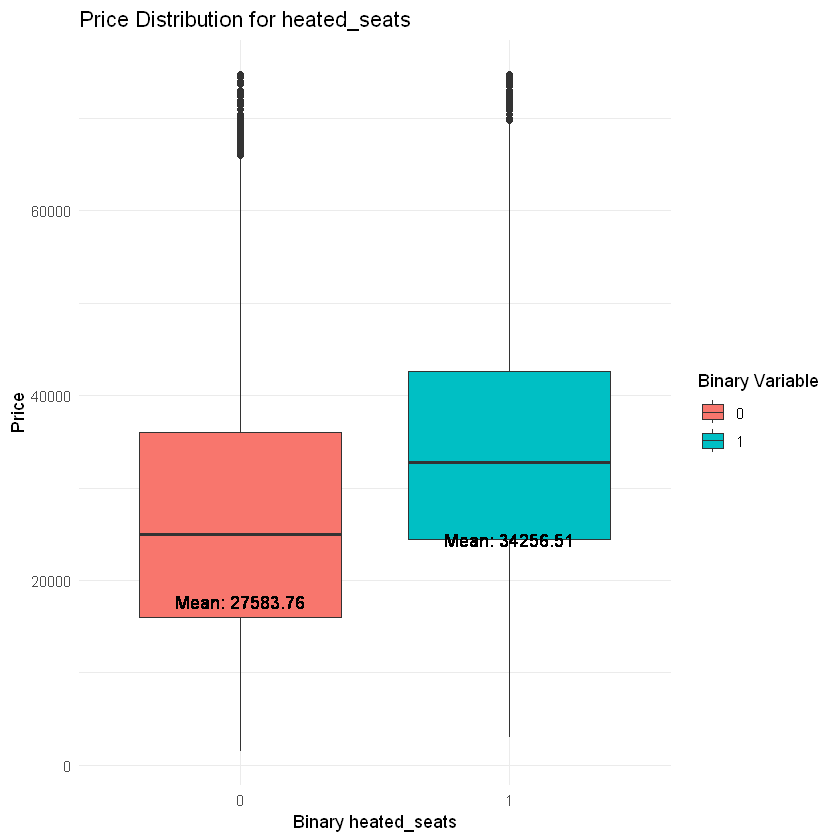

In [22]:
# Create an empty list to store boxplot objects
boxplot_list <- list()

# Loop through each binary variable
for (col in binary_vars) {
  # Filter data for each binary variable value (0 and 1)
  data_0 <- subset(train_data, train_data[[col]] == 0)
  data_1 <- subset(train_data, train_data[[col]] == 1)
  
  # Calculate mean for each subset
  mean_0 <- mean(data_0$price)
  mean_1 <- mean(data_1$price)
  
  # Create boxplot with color differentiation based on binary variable value
  boxplot <- ggplot(train_data, aes(x = factor(train_data[[col]]), y = price, fill = factor(train_data[[col]]))) +
    geom_boxplot() +
    labs(x = paste("Binary", col), y = "Price", fill = "Binary Variable") +
    ggtitle(paste("Price Distribution for", col)) +
    theme_minimal() +
    # Add mean labels on the boxplots
    geom_text(aes(label = paste("Mean:", round(mean_0, 2))), x = 1, y = mean_0, vjust = 7, color = "black") +
    geom_text(aes(label = paste("Mean:", round(mean_1, 2))), x = 2, y = mean_1, vjust = 7, color = "black")
  
  # Store boxplot object in the list
  boxplot_list[[col]] <- boxplot
}

# Loop through the stored boxplots and print them one at a time
for (col_key in names(boxplot_list)) {
  print(boxplot_list[[col_key]])
  cat("\n")
}


In [23]:
# Subset the numerical variables and price from your data frame
numerical_price <- train_data[, c("price", "age", "mileage", "engine_size", "min_mpg", "max_mpg")]

# Calculate the correlation matrix
correlation_matrix <- cor(numerical_price)

# Print the correlation matrix
print(correlation_matrix)

                 price         age     mileage engine_size     min_mpg
price        1.0000000 -0.53166754 -0.60907053   0.3415375 -0.25399355
age         -0.5316675  1.00000000  0.62000099   0.1249641 -0.04206921
mileage     -0.6090705  0.62000099  1.00000000   0.1041076 -0.01721725
engine_size  0.3415375  0.12496411  0.10410763   1.0000000 -0.39176029
min_mpg     -0.2539936 -0.04206921 -0.01721725  -0.3917603  1.00000000
max_mpg     -0.2782071 -0.02230993 -0.01058467  -0.4193267  0.91941468
                max_mpg
price       -0.27820709
age         -0.02230993
mileage     -0.01058467
engine_size -0.41932671
min_mpg      0.91941468
max_mpg      1.00000000


In [24]:
bin_var_names <- c(
  "automatic_transmission", "damaged", "first_owner", "personal_using", "turbo",
  "alloy_wheels", "adaptive_cruise_control", "navigation_system", "power_liftgate",
  "backup_camera", "keyless_start", "remote_start", "sunroof.moonroof",
  "automatic_emergency_braking", "stability_control", "leather_seats",
  "memory_seat", "third_row_seating", "apple_car_play.android_auto", "bluetooth",
  "usb_port", "heated_seats"
)

num_var_names <- c("year", "mileage", "engine_size", "min_mpg", "max_mpg")

cat_var_names <- c("brand", "model", "engine", "transmission", "fuel_type", 
                   "drivetrain", "interior_color", "exterior_color")

In [25]:
# Loop through each binary variable
for (value in bin_var_names) {
  # Fit the ANOVA model
  model_anova <- aov(price ~ get(value), data = train_data)
  
  # Get the variable name for labeling
  var_name <- value
  
  # Print the ANOVA results
  cat("ANOVA results for", var_name, ":\n")
  print(anova(model_anova))
  cat("________________________________\n")
}

ANOVA results for automatic_transmission :
Analysis of Variance Table

Response: price
              Df     Sum Sq    Mean Sq F value    Pr(>F)    
get(value)     1 8.5265e+10 8.5265e+10   398.8 < 2.2e-16 ***
Residuals  14188 3.0334e+12 2.1380e+08                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
________________________________
ANOVA results for damaged :
Analysis of Variance Table

Response: price
              Df     Sum Sq    Mean Sq F value    Pr(>F)    
get(value)     1 1.5061e+11 1.5061e+11  719.96 < 2.2e-16 ***
Residuals  14188 2.9681e+12 2.0920e+08                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
________________________________
ANOVA results for first_owner :
Analysis of Variance Table

Response: price
              Df     Sum Sq    Mean Sq F value    Pr(>F)    
get(value)     1 2.7144e+11 2.7144e+11  1352.6 < 2.2e-16 ***
Residuals  14188 2.8473e+12 2.0068e+08                      
---
Signif. code

In [26]:
# Loop through each binary variable
for (value in cat_var_names) {
  # Fit the ANOVA model
  model_anova <- aov(price ~ get(value), data = train_data)
  
  # Get the variable name for labeling
  var_name <- value
  
  # Print the ANOVA results
  cat("ANOVA results for", var_name, ":\n")
  print(anova(model_anova))
  cat("________________________________\n")
}

ANOVA results for brand :
Analysis of Variance Table

Response: price
              Df     Sum Sq    Mean Sq F value    Pr(>F)    
get(value)    24 8.0651e+11 3.3604e+10  205.87 < 2.2e-16 ***
Residuals  14165 2.3122e+12 1.6323e+08                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
________________________________
ANOVA results for model :
Analysis of Variance Table

Response: price
              Df     Sum Sq   Mean Sq F value    Pr(>F)    
get(value)  2813 2.5754e+12 915524850  19.169 < 2.2e-16 ***
Residuals  11376 5.4333e+11  47761005                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
________________________________
ANOVA results for engine :
Analysis of Variance Table

Response: price
              Df     Sum Sq    Mean Sq F value    Pr(>F)    
get(value)   869 1.8736e+12 2156066841  23.066 < 2.2e-16 ***
Residuals  13320 1.2451e+12   93474362                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01

In [27]:
new_string <- paste(bin_var_names, collapse = " + ")

print(new_string)

[1] "automatic_transmission + damaged + first_owner + personal_using + turbo + alloy_wheels + adaptive_cruise_control + navigation_system + power_liftgate + backup_camera + keyless_start + remote_start + sunroof.moonroof + automatic_emergency_braking + stability_control + leather_seats + memory_seat + third_row_seating + apple_car_play.android_auto + bluetooth + usb_port + heated_seats"


In [66]:
# Concatenate all strings with plus signs
new_string <- paste(cat_var_names, collapse = " + ")

# Print the new string
print(new_string)

[1] "brand + model + engine + transmission + fuel_type + drivetrain + interior_color + exterior_color"


In [60]:
# Formula for linear model
formula_lm <- formula("price ~ age * mileage + engine_size + min_mpg + max_mpg")

# Fit linear model using lm() function
lm_model <- lm(formula_lm, data = train_data)

# Summary of the linear model
summary(lm_model)


Call:
lm(formula = formula_lm, data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-24220  -5140   -864   3957  49413 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.148e+04  4.658e+02  89.063  < 2e-16 ***
age         -1.385e+03  2.792e+01 -49.586  < 2e-16 ***
mileage     -2.183e-01  3.504e-03 -62.312  < 2e-16 ***
engine_size  4.358e+03  6.821e+01  63.888  < 2e-16 ***
min_mpg     -6.256e+01  2.839e+01  -2.203   0.0276 *  
max_mpg     -1.970e+02  2.689e+01  -7.327 2.48e-13 ***
age:mileage  6.866e-03  3.227e-04  21.274  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7630 on 13469 degrees of freedom
Multiple R-squared:  0.6387,	Adjusted R-squared:  0.6386 
F-statistic:  3969 on 6 and 13469 DF,  p-value: < 2.2e-16


In [63]:
# Formula for linear model
formula_lm <- formula("price ~ age * mileage + engine_size + max_mpg")

# Fit linear model using lm() function
lm_model <- lm(formula_lm, data = train_data)

# Summary of the linear model
summary(lm_model)


Call:
lm(formula = formula_lm, data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-24426  -5143   -855   3956  49421 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.165e+04  4.598e+02   90.58   <2e-16 ***
age         -1.380e+03  2.786e+01  -49.54   <2e-16 ***
mileage     -2.182e-01  3.503e-03  -62.27   <2e-16 ***
engine_size  4.358e+03  6.822e+01   63.88   <2e-16 ***
max_mpg     -2.506e+02  1.144e+01  -21.91   <2e-16 ***
age:mileage  6.837e-03  3.225e-04   21.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7631 on 13470 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6385 
F-statistic:  4761 on 5 and 13470 DF,  p-value: < 2.2e-16


In [65]:
mini_lm <- lm(price ~ year * mileage, data = train_data)
summary(mini_lm)


Call:
lm(formula = price ~ year * mileage, data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-26144  -6837  -1589   5669  46120 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.384e+06  6.893e+04  -34.58   <2e-16 ***
year          1.200e+03  3.414e+01   35.15   <2e-16 ***
mileage       1.182e+01  7.987e-01   14.79   <2e-16 ***
year:mileage -5.937e-03  3.963e-04  -14.98   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9385 on 13472 degrees of freedom
Multiple R-squared:  0.4534,	Adjusted R-squared:  0.4532 
F-statistic:  3724 on 3 and 13472 DF,  p-value: < 2.2e-16


In [35]:
test_data <- read.csv("C:/Users/swift/Desktop/test.csv")

In [36]:
data_information(test_data)

                      variable num_missing num_unique data_type
1                        brand           0         26 character
2                        model           0       1909 character
3                         year           1         44   numeric
4                      mileage           1       4667   numeric
5                       engine           0        569 character
6                  engine_size         285         49   numeric
7                 transmission           0         97 character
8       automatic_transmission           1          2   numeric
9                    fuel_type           0          7 character
10                  drivetrain           0          5 character
11                     min_mpg         746         47   numeric
12                     max_mpg         746         44   numeric
13                     damaged          55          2   numeric
14                 first_owner          89          2   numeric
15              personal_using          

In [37]:
test_data <- treatment1(test_data)

Warning message in treatment1(test_data):
"NAs introduced by coercion"


In [38]:
data_information(test_data)

                      variable num_missing num_unique data_type
1                        brand           0         25 character
2                        model           0       1585 character
3                         year           0         36   numeric
4                      mileage           0       3667   numeric
5                       engine           0        457 character
6                  engine_size           0         46   numeric
7                 transmission           0         74 character
8       automatic_transmission           0          2   numeric
9                    fuel_type           0          5 character
10                  drivetrain           0          4 character
11                     min_mpg           0         47   numeric
12                     max_mpg           0         43   numeric
13                     damaged           0          2   numeric
14                 first_owner           0          2   numeric
15              personal_using          

In [ ]:
predictions <- predict(lm_model, newdata = clean_test_data)

actual_values <- clean_test_data$price

RMSE <- sqrt(mean((actual_values - predictions)^2))
MAE <- mean(abs(actual_values - predictions))
R_squared <- cor(actual_values, predictions)^2

cat("RMSE:", RMSE, '\n')
cat("MAE:", MAE, '\n')
cat("R-squared:", R_squared, '\n')


In [ ]:
predictions <- predict(mini_lm, newdata = clean_test_data)

actual_values <- clean_test_data$price

RMSE <- sqrt(mean((actual_values - predictions)^2))
MAE <- mean(abs(actual_values - predictions))
R_squared <- cor(actual_values, predictions)^2

cat("RMSE:", RMSE, '\n')
cat("MAE:", MAE, '\n')
cat("R-squared:", R_squared, '\n')

In [ ]:
predictions <- predict(lm_model, newdata = clean_test_data)

actual_values <- clean_test_data$price

RMSE <- sqrt(mean((actual_values - predictions)^2))
MAE <- mean(abs(actual_values - predictions))
R_squared <- cor(actual_values, predictions)^2

cat("RMSE:", RMSE, '\n')
cat("MAE:", MAE, '\n')
cat("R-squared:", R_squared, '\n')
